### Imports

In [1]:
%config Completer.use_jedi = False
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import locale

locale.setlocale(locale.LC_TIME, 'fr_FR.UTF-8')
pd.set_option('display.max_columns', None)
#pd.set_option('low_memory',False)
sns.set_palette(sns.color_palette("tab10"))

### Lecture du fichier CSV

In [2]:
#df =pd.read_csv("./../../data/acc_2019_to_2022.csv",sep=';',low_memory=False)
df = pd.read_csv('../../Data/accidents_merge.zip',low_memory=False,compression=dict(method='zip', archive_name='accidents_merge.csv'))
df.head()

Num_Acc_x  jour  mois    an   hrmn  lum dep    com  agg  int  atm  col  \
0  201900000001    30    11  2019  01:30    4  93  93053    1    1    1    2   
1  201900000001    30    11  2019  01:30    4  93  93053    1    1    1    2   
2  201900000001    30    11  2019  01:30    4  93  93053    1    1    1    2   
3  201900000002    30    11  2019  02:50    3  93  93066    1    1    1    6   
4  201900000003    28    11  2019  15:15    1  92  92036    1    1    1    4   

             adr         lat       long  catr voie   v1   v2  circ nbv  vosp  \
0   AUTOROUTE A3  48,8962100  2,4701200     1    3  0.0  NaN     3  10     0   
1   AUTOROUTE A3  48,8962100  2,4701200     1    3  0.0  NaN     3  10     0   
2   AUTOROUTE A3  48,8962100  2,4701200     1    3  0.0  NaN     3  10     0   
3   AUTOROUTE A1  48,9307000  2,3688000     1    1  0.0  NaN     1   2     0   
4  AUTOROUTE A86  48,9358718  2,3191744     1   86  0.0  NaN     3   8     0   

   prof  pr  pr1  plan lartpc larrout  surf  infra  situ  vma  id_vehicule  \
0     1   6  900     2    NaN     NaN     1      2     1   70  138 306 524   
1     1   6  900     2    NaN     NaN     1      2     1   70  138 306 524   
2     1   6  900     2    NaN     NaN     1      2     1   70  138 306 525   
3     4   3  845     2    NaN     NaN     1      0     1   70  138 306 523   
4     1  10  500     3    NaN     NaN     1      0     1   90  138 306 520   

  num_veh_x  senc  catv  obs  obsm  choc  manv  motor  occutc     Num_Acc_y  \
0       B01     2     7    0     2     5    23      1     NaN  201900000001   
1       B01     2     7    0     2     5    23      1     NaN  201900000001   
2       A01     2    17    1     0     3    11      1     NaN  201900000001   
3       A01     1     7    4     0     1     0      1     NaN  201900000002   
4       A01     1     7    0     2     1     2      1     NaN  201900000003   

  num_veh_y  place  catu  grav  sexe  an_nais  trajet  secu1  secu2  secu3  \
0       B01      2     2     4     2   2002.0       0      1      0     -1   
1       B01      1     1     4     2   1993.0       5      1      0     -1   
2       A01      1     1     1     1   1959.0       0      1      0     -1   
3       A01      1     1     4     2   1994.0       0      1      0     -1   
4       A01      1     1     1     1   1996.0       0      1      0     -1   

   locp actp  etatp id_usager  
0    -1   -1     -1       NaN  
1    -1   -1     -1       NaN  
2    -1   -1     -1       NaN  
3    -1   -1     -1       NaN  
4    -1    0     -1       NaN

### Informations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494182 entries, 0 to 494181
Data columns (total 57 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc_x    494182 non-null  int64  
 1   jour         494182 non-null  int64  
 2   mois         494182 non-null  int64  
 3   an           494182 non-null  int64  
 4   hrmn         494182 non-null  object 
 5   lum          494182 non-null  int64  
 6   dep          494182 non-null  object 
 7   com          494182 non-null  object 
 8   agg          494182 non-null  int64  
 9   int          494182 non-null  int64  
 10  atm          494182 non-null  int64  
 11  col          494182 non-null  int64  
 12  adr          488131 non-null  object 
 13  lat          494182 non-null  object 
 14  long         494182 non-null  object 
 15  catr         494182 non-null  int64  
 16  voie         446618 non-null  object 
 17  v1           469586 non-null  float64
 18  v2           39542 non-n

### Suppression des lignes dupliqués

In [4]:
print("Nombre de ligne dupliqués avant :",df.duplicated().sum())
#df.duplicated().sum
df = df.drop_duplicates()

print("Nombre de ligne dupliqués après :",df.duplicated().sum())

Nombre de ligne dupliqués avant : 164
Nombre de ligne dupliqués après : 0


### Fonction de test chi2

In [5]:

def test_chi2(data_frame , var:str,var_cible:str,show_cross_tab=False):
    
    ct= pd.crosstab(data_frame[var], data_frame[var_cible])

    if show_cross_tab:
        display(ct)
    
    chi2_stat, p_value, dof, expected_freq =chi2_contingency(ct)
    
    print('Test chi2 (',var,',',var_cible,')','p-value :',p_value)

    if p_value<0.05:
        # Cramer
        n = ct.sum().sum()
        min_dim = min(ct.shape) - 1
        cramer_v = np.sqrt(chi2_stat / (n * min_dim))
        
        # Afficher le coefficient de Cramér-V
        print("Potentiel Correlation entre :",var,"et",var_cible,"Coef Cramér-V :", cramer_v)
        # V = 0 : Aucune association entre les variables.
        # V proche de 0.1 : Faible association.
        # V proche de 0.3 : Association modérée.
        # V proche de 0.5 et plus : Association forte



## 1 - Etude de la variable cible (grav)

In [6]:
grav_dico={1: 'Indemne',
             2: 'Tué',
             3: 'Blessé hospitalisé',
             4: 'Blessé léger'
          }

df_grav = df.copy()

### Suppression des non renseignés
df_grav=df_grav[df_grav.grav!=-1]

df_grav['grav']=df_grav['grav'].map(grav_dico)

## Répartition de la variale cible (grav)

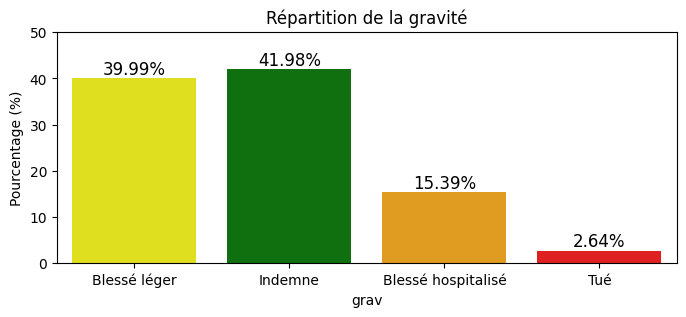

In [7]:

grav_palette = {'Indemne':'green',
                 'Blessé léger':'yellow',
                 'Blessé hospitalisé':'orange',
                 'Tué' : 'red',              
             }
grav_order =['Indemne','Blessé léger','Blessé hospitalisé','Tué']

plt.figure(figsize=(8, 3))
ax=sns.countplot(data=df_grav,x='grav',hue='grav',stat='percent',hue_order=grav_order,palette=grav_palette)

plt.title('Répartition de la gravité')
plt.ylabel("Pourcentage (%)")
plt.ylim([0,50])

# Ajouter les annotations avec deux chiffres après la virgule

for p in ax.patches:
    #print(p.get_height())
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')
#save_fig("repar_var_grav")
plt.show()



**Remarques:**
>* Un pourcentage très très faible des tués

# 2- Analyse des variables explicatives catégorielles

###  Année(an)

Taux de NA : 0.0 %
Unique value :  [2019 2020 2021 2022]


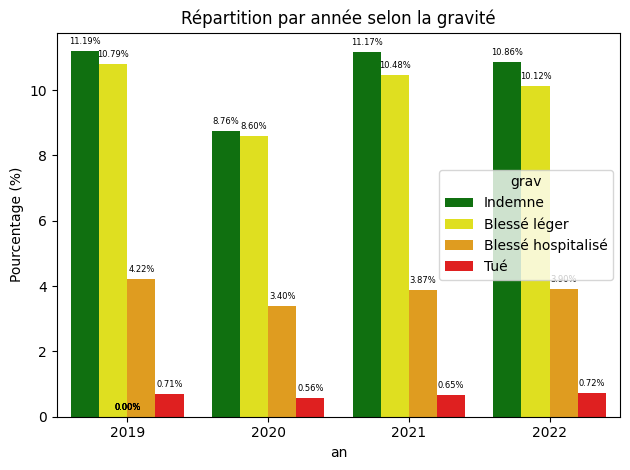


**** Test chi-2 ****
Test chi2 ( an , grav ) p-value : 3.456363161549726e-26
Potentiel Correlation entre : an et grav Coef Cramér-V : 0.009801711237595847


In [8]:
# NA
print("Taux de NA :",df_grav.an.isna().sum()*100/df_grav.shape[0],"%")
print("Unique value : ",df_grav.an.unique())

## Repartition 
ax=sns.countplot(df_grav,x='an',hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order)

plt.title('Répartition par année selon la gravité')
plt.ylabel("Pourcentage (%)")
#plt.ylim([0,15])

# Ajouter les annotations avec deux chiffres après la virgule
for p in ax.patches:
    #print(p.get_height())
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=6, color='black', xytext=(0, 5),
                textcoords='offset points')

#save_fig("histo_plot")
#plt.xticks(rotation=0, ha='right') 
plt.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav ,"an","grav")

**Remarques:**
>* On remarque une baisse en 2020, ce qui correspond à l'année du covid-19 et du confinement obligatoire de la population
>* Une répartition quasiment similaire de la gravité selon les années
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre l'année et la gravité

### Mois(mois)

Taux de NA : 0.0 %
Unique value :  [11  9  7  2  1  5  4  8  6 10  3 12]


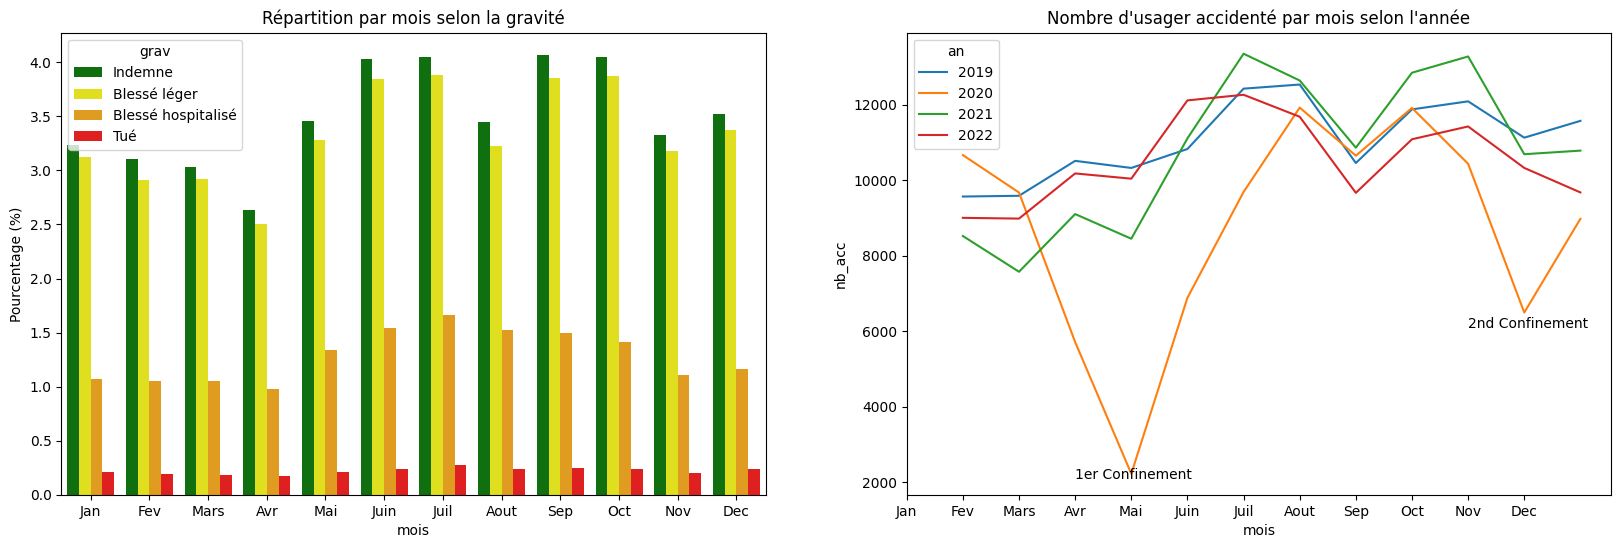


**** Test chi-2 ****
Test chi2 ( mois , grav ) p-value : 7.717772866322059e-104
Potentiel Correlation entre : mois et grav Coef Cramér-V : 0.020006535423710142


In [9]:
print("Taux de NA :",df_grav.mois.isna().sum()*100/df_grav.shape[0],"%")
print("Unique value : ",df_grav.mois.unique())

fig, axes = plt.subplots(1, 2, figsize=(20, 6))


sns.countplot(df_grav,x='mois',hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axes[0])

axes[0].set_title('Répartition par mois selon la gravité')
axes[0].set_ylabel("Pourcentage (%)")
axes[0].set_xticks(range(0,12), ['Jan','Fev','Mars','Avr','Mai','Juin','Juil','Aout','Sep','Oct','Nov','Dec'])


df_mois = df_grav.groupby(['mois','an'])['Num_Acc_x'].count().reset_index(name='nb_acc')

sns.lineplot(df_mois,x='mois',y='nb_acc',hue='an',palette='tab10',ax=axes[1])

axes[1].set_title("Nombre d'usager accidenté par mois selon l'année")
axes[1].text(3, 2100, "1er Confinement")
axes[1].text(10, 6100, "2nd Confinement")
axes[1].set_xticks(range(0,12), ['Jan','Fev','Mars','Avr','Mai','Juin','Juil','Aout','Sep','Oct','Nov','Dec'])

plt.show()


## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav ,"mois","grav")

del df_mois

**Remarques:**
>* Les courbes ont le même profile du nombre d'accidents selon les mois d'une année sauf celle de 2020
>* On remarque une baisse de Janvier à Avril puis une remontée jusqu'en juil et une seconde baisse entre Aout et septembre (vacances), sauf en 2020
>* La baisse d'accident en 2020 correspond bien aux période du 1er et 2nd confinement la pandemie COVID-19
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre l'année et la gravité

### Jour(jour)

#### 1 - Jour du mois

Taux de NA : 0.0 %
Unique value :  [30 28 29 27 25 22  6 26 24 21 20 19  1 18 17 16 12  2 13 15 14  9 23 10
  3  8  5 11  4  7 31]


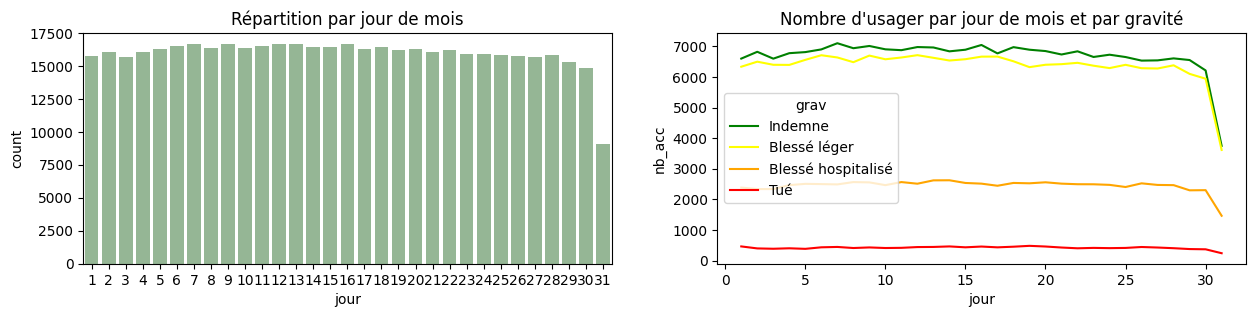


**** Test chi-2 ****
Test chi2 ( jour , grav ) p-value : 0.08067161743021466


In [10]:

print("Taux de NA :",df_grav.jour.isna().sum()*100/df_grav.shape[0],"%")
print("Unique value : ",df_grav.jour.unique())

fig, axes = plt.subplots(1, 2, figsize=(15, 3))

sns.countplot(df_grav,x='jour',color='#8FBC8F',ax=axes[0])
axes[0].set_title('Répartition par jour de mois')


df_jour = df_grav.groupby(['jour','grav'])['Num_Acc_x'].count().reset_index(name='nb_acc')

sns.lineplot(df_jour,x='jour',y='nb_acc',hue='grav',palette=grav_palette,ax=axes[1],hue_order=grav_order)
axes[1].set_title("Nombre d'usager par jour de mois et par gravité")

plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav[df_grav.grav!='Non renseigné'] ,"jour","grav")

del df_jour

**Remarques:**
>* Le 31 on a une baisse significative, cela est due au fait que tous les mois n'ont pas 31 jour
>* On observe une stabilité du nombre d'accidents selon les jours du mois par gravité
>* Test de chi-2 avec p-value > 0.05 donc pas de dépendance significative entre le jour et la gravité

#### 2- Jour de la semaine

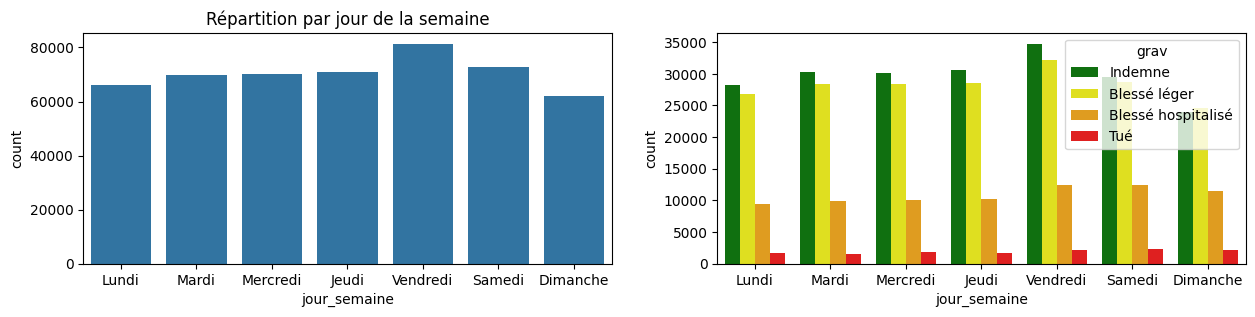

In [11]:


df_jour = df_grav.copy()

df_jour['date_complet'] = df_jour.an.astype(str)+"-"+df_jour.mois.astype(str)+"-"+df_jour.jour.astype(str)
df_jour['date_complet'] = pd.to_datetime(df_jour['date_complet'])
df_jour['jour_semaine'] = df_jour['date_complet'].dt.strftime('%A')

day_order=['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']

fig, axes = plt.subplots(1, 2, figsize=(15, 3))
sns.countplot(df_jour,x='jour_semaine',ax=axes[0],order=day_order)
axes[0].set_title('Répartition par jour de la semaine')


sns.countplot(df_jour,x='jour_semaine',hue='grav',palette=grav_palette,hue_order=grav_order,ax=axes[1],order=day_order)
axes[0].set_title('Répartition par jour de la semaine')

plt.show()

del df_jour


>* On remarque une légère augmentation du nombre d'accidents le vendredi
>* Et une baisse le dimanche

### Heure

Taux de NA : 0.0 %
Unique value :  ['01:30' '02:50' '15:15' ... '03:54' '04:54' '04:24']


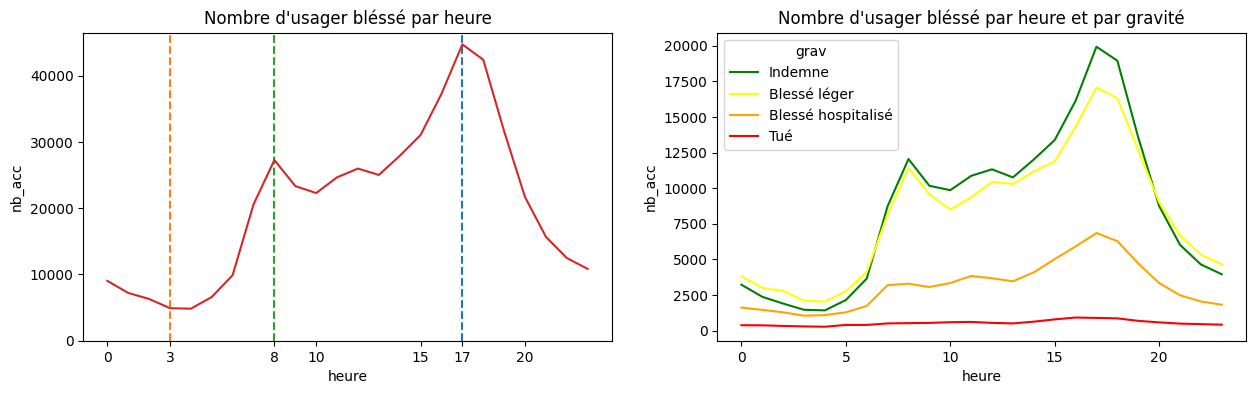


**** Test chi-2 ****
Test chi2 ( heure , grav ) p-value : 0.0
Potentiel Correlation entre : heure et grav Coef Cramér-V : 0.05511533702059507


In [12]:
print("Taux de NA :",df_grav.hrmn.isna().sum()*100/df_grav.shape[0],"%")
print("Unique value : ",df_grav.hrmn.unique())

df_heure = df_grav.copy()
df_heure['time'] = pd.to_timedelta(df_heure['hrmn'] + ':00')
df_heure['heure'] = df_heure['time'].dt.components['hours']
#df['time_numeric'] = df['time'].dt.total_seconds() / 3600 

## 
fig, axs = plt.subplots(ncols=2,figsize=(15, 4))
axs[0].plot([17,17],[0,55000],'--')
axs[0].plot([3,3],[0,55000],'--')
axs[0].plot([8,8],[0,55000],'--')

#h=df_heure.groupby(['heure']).count()
h=df_heure.groupby(['heure']).agg({'Num_Acc_x' :'count'}).reset_index().rename(columns={'Num_Acc_x': 'nb_acc'})

#display(h)

sns.lineplot(data=h,x='heure',y='nb_acc',ax=axs[0])


h=df_heure.groupby(['heure','grav']).agg({'Num_Acc_x' :'count'}).reset_index().rename(columns={'Num_Acc_x': 'nb_acc'})

sns.lineplot(data=h,x='heure',y='nb_acc',hue='grav',ax=axs[1],palette=grav_palette,hue_order=grav_order)


axs[0].set_title("Nombre d'usager bléssé par heure")
axs[1].set_title("Nombre d'usager bléssé par heure et par gravité")
axs[0].set_xticks([0,3,8,10,15,17,20])
axs[0].set_ylim([0,46500])
plt.show()


print()
print("**** Test chi-2 ****")
test_chi2(df_heure[df_heure.grav!='Non renseigné'] ,"heure","grav")

del df_heure
del h

**Remarques:**
>* On remarque une baisse de 0 à 3h
>* une augmentation progressive de 3h à 17H
>* Une baisse progressive de 17H jusqu'a 3H
>* Les profils de Idemme,blessé leger et hospitalisé sont identiques sauf celui de tué
>* Le nombre de tués est stable durant la journée on observe juste une légère augmentation des tuées entre 15H et 19H
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre l'heure et la gravité

### Luminosité (lum)

Taux de NA : 0.0 %
Unique value :  [ 4  3  1  5  2 -1]


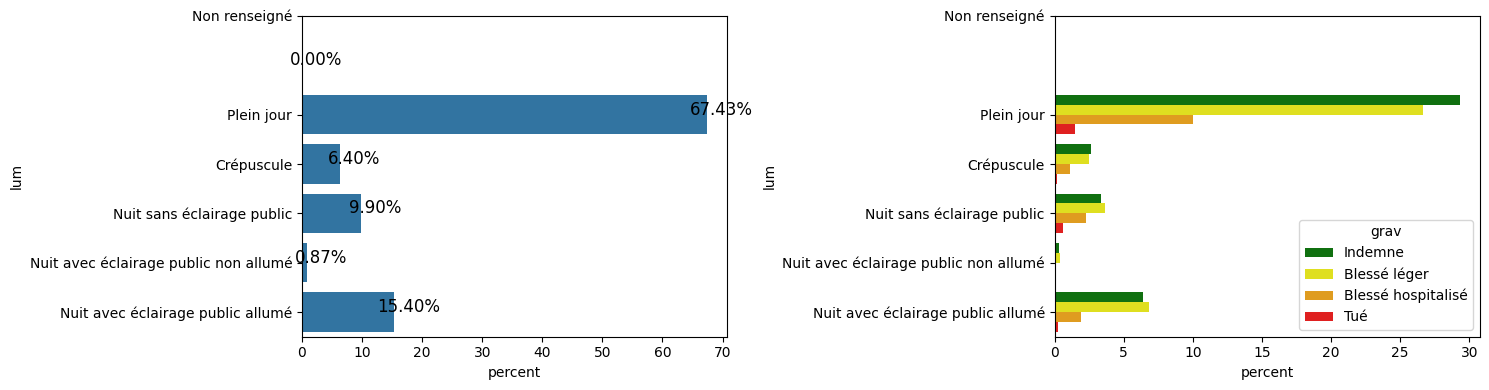


**** Test chi-2 ****
Test chi2 ( lum , grav ) p-value : 0.0
Potentiel Correlation entre : lum et grav Coef Cramér-V : 0.06908099303240353


In [13]:
lum_label = ['Non renseigné',
            'Plein jour',
            'Crépuscule',
            'Nuit sans éclairage public',
            'Nuit avec éclairage public non allumé',
            'Nuit avec éclairage public allumé']

lum_code=[-1,1,2,3,4,5]

print("Taux de NA :",df_grav.lum.isna().sum()*100/df_grav.shape[0],"%")
print("Unique value : ",df_grav.lum.unique())
#print("MOD : ",df_grav.lum.mode())

fig, axs = plt.subplots(ncols=2,figsize=(15, 4))


sns.countplot(df_grav,y='lum',stat="percent",ax=axs[0])
sns.countplot(df_grav,y='lum',stat="percent",hue='grav',hue_order=grav_order,palette=grav_palette,ax=axs[1])

axs[0].set_yticks(lum_code,lum_label)
axs[1].set_yticks(lum_code,lum_label)

for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(10, 0),
                textcoords='offset points')

fig.tight_layout()

plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav[df_grav.lum!=-1] ,"lum","grav")

**Remarques:**
>* La plus part des accidents se font en plein jour
>* Le nombre d'accident les graves se font la journné en plein jour
>* Le test du chi-2 et le coefficient de Cramér révèlent une très très faible association entre la luminosité et la gravité

### Département(dep)

Taux de NA : 0.0 %


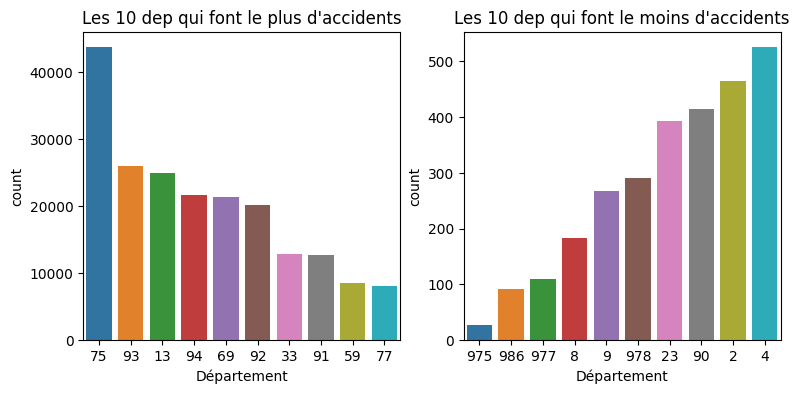

In [14]:
print("Taux de NA :",df_grav.dep.isna().sum()*100/df_grav.shape[0],"%")
#print("Unique value : ",df_grav.dep.unique())

dep_plus_acc=df_grav.dep.value_counts(ascending=False).head(10).reset_index(name='count')
dep_moins_acc=df_grav.dep.value_counts(ascending=True).head(10).reset_index(name='count')

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.barplot(data=dep_plus_acc,x='dep',y='count',ax=axes[0],hue='dep')
axes[0].set_title("Les 10 dep qui font le plus d'accidents")
axes[0].set_xlabel("Département")

sns.barplot(data=dep_moins_acc,x='dep',y='count',ax=axes[1],hue='dep')
axes[1].set_title("Les 10 dep qui font le moins d'accidents")
axes[1].set_xlabel("Département")

#save_fig("repar_var_dep")
plt.show()


### Commune(com)

Taux de NA : 0.0 %


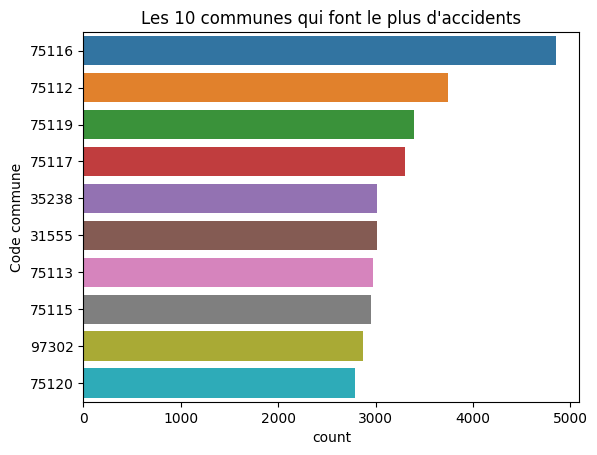

In [15]:

print("Taux de NA :",df_grav.dep.isna().sum()*100/df_grav.shape[0],"%")

com_plus_acc=df_grav.com.value_counts(ascending=False).head(10).reset_index(name='count')
com_moins_acc=df_grav.com.value_counts(ascending=True).head(10).reset_index(name='count')


#fig, axes = plt.subplots(1, 1, figsize=(9, 6))

sns.barplot(data=com_plus_acc,x='count',y='com',hue='com')
plt.title("Les 10 communes qui font le plus d'accidents")
plt.ylabel("Code commune")

#sns.barplot(data=com_moins_acc,x='com',y='count',ax=axes[1],hue='dep')
#axes[1].set_title("Les 10 commune qui font le moins d'accidents")
#axes[1].set_xlabel("Commune")

#save_fig("repar_var_com")
plt.show()

###  Agglomeration(agg)

Taux de NA : 0.0 %
Unique value :  [1 2]


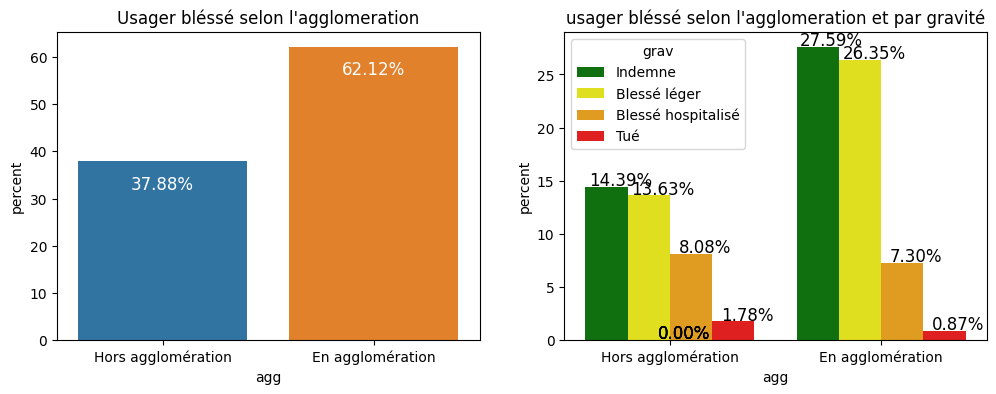


**** Test chi-2 ****
Test chi2 ( agg , grav ) p-value : 0.0
Potentiel Correlation entre : agg et grav Coef Cramér-V : 0.16862733945841224


In [16]:

print("Taux de NA :",df_grav['agg'].isna().sum()*100/df_grav.shape[0],"%")
print("Unique value : ",df_grav['agg'].unique())

fig, axs = plt.subplots(ncols=2,figsize=(12, 4))

sns.countplot(data=df_grav,x='agg',hue='agg',stat='percent',ax=axs[0],palette='tab10',legend=False)
sns.countplot(data=df_grav,x='agg',hue='grav',stat='percent',ax=axs[1]
              ,palette=grav_palette,hue_order=grav_order
             )

axs[0].set_title("Usager bléssé selon l'agglomeration")
axs[1].set_title("usager bléssé selon l'agglomeration et par gravité")

axs[0].set_xticks(['1','2'],['Hors agglomération','En agglomération'])
axs[1].set_xticks(['1','2'],['Hors agglomération','En agglomération'])

for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='white', xytext=(0, -20),
                textcoords='offset points')

for p in axs[1].patches:
    axs[1].annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(10, 1),
                textcoords='offset points')

#save_fig("repar_var_agglo")
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav,"agg","grav")

**Remarques:**
>* Plus d'accidents en agglomeration mais deux fois plus tué en hors agglomération
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre l'agglomération et la gravité

### Type d'intersection (int)

Taux de NA : 0.0 %
Taux de non renseigne : 0.004253448838099559 %
Unique value :  [ 1  3  9  4  2  6  5  7  8 -1]


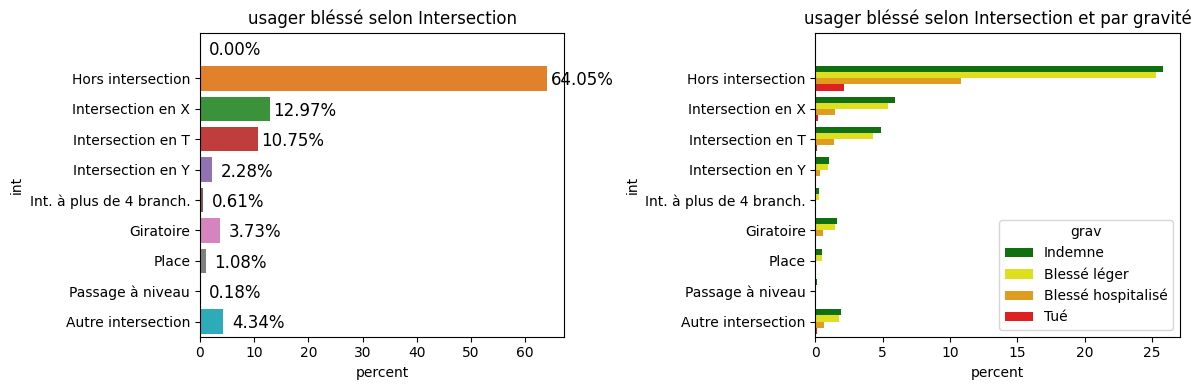


**** Test chi-2 ****
Test chi2 ( int , grav ) p-value : 0.0
Potentiel Correlation entre : int et grav Coef Cramér-V : 0.054002193716735356


In [17]:
print("Taux de NA :",df_grav.int.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.int==-1].int.count()*100/df_grav.shape[0],"%")
print("Unique value : ",df_grav.int.unique())

fig, axs = plt.subplots(ncols=2,figsize=(12, 4))

sns.countplot(data=df_grav,y='int',stat='percent',ax=axs[0],hue="int",palette='tab10',legend=False)

sns.countplot(data=df_grav,y='int',hue='grav',stat='percent',ax=axs[1]
             ,palette=grav_palette,hue_order=grav_order)

axs[0].set_title("usager bléssé selon Intersection")
axs[1].set_title("usager bléssé selon Intersection et par gravité")

int_code=[1,2,3,4,5,6,7,8,9]
int_labels=[
   'Hors intersection',
   'Intersection en X',
   'Intersection en T',
   'Intersection en Y',
   'Int. à plus de 4 branch.',
   'Giratoire',
   'Place',
   'Passage à niveau',
   'Autre intersection']

axs[0].set_yticks(int_code,int_labels)
axs[1].set_yticks(int_code,int_labels)

for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.int!=-1],"int","grav")

**Remarques:**
>* 64% des usagers d'accidentés sont hors intersection
>* Le nombres d'accidents les plus graves se font en Hors intersection
>* Le test du chi-2 et le coefficient de Cramér révèlent une très très faible association entre l'intersection et la gravité

### Conditions atmosphérique (atm)

Taux de NA : 0.0 %
Taux de non renseigne : 0.006683991031299307 %


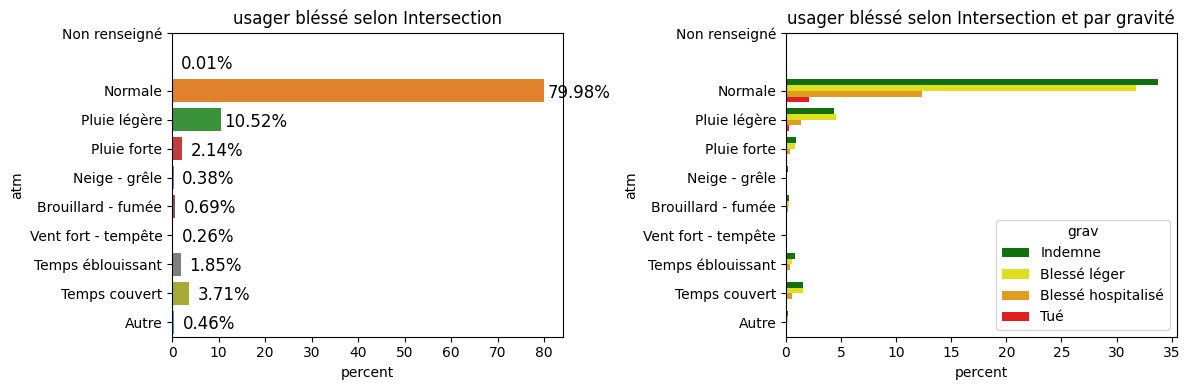


**** Test chi-2 ****
Test chi2 ( atm , grav ) p-value : 0.0
Potentiel Correlation entre : atm et grav Coef Cramér-V : 0.03320625478285014


In [18]:
print("Taux de NA :",df_grav.atm.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.atm==-1].atm.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(12, 4))

sns.countplot(data=df_grav,y='atm',stat='percent',ax=axs[0],hue='atm',legend=False,palette='tab10')

sns.countplot(data=df_grav,y='atm',hue='grav',stat='percent',ax=axs[1]
             ,palette=grav_palette,hue_order=grav_order)

axs[0].set_title("usager bléssé selon Intersection")
axs[1].set_title("usager bléssé selon Intersection et par gravité")

atm_code=[-1,1,2,3,4,5,6,7,8,9]
atm_labels=['Non renseigné','Normale','Pluie légère','Pluie forte','Neige - grêle','Brouillard - fumée','Vent fort - tempête','Temps éblouissant',
            'Temps couvert','Autre']

axs[0].set_yticks(atm_code,atm_labels)
axs[1].set_yticks(atm_code,atm_labels)

for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
#save_fig("repar_var_condition_atm")
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.atm!=-1],"atm","grav")


**Remarques:**
>* La plus part des accidents se font dans les conditions atmosphérique normale
>* Le nombre de tués est plus important dans les conditions normale
>* Le test du chi-2 et le coefficient de Cramér révèlent très une faible association entre les conditions atmosphérique et la gravité

### Type de collison(col)

Taux de NA : 0.0 %
Taux de non renseigne : 0.7838498573069187 %


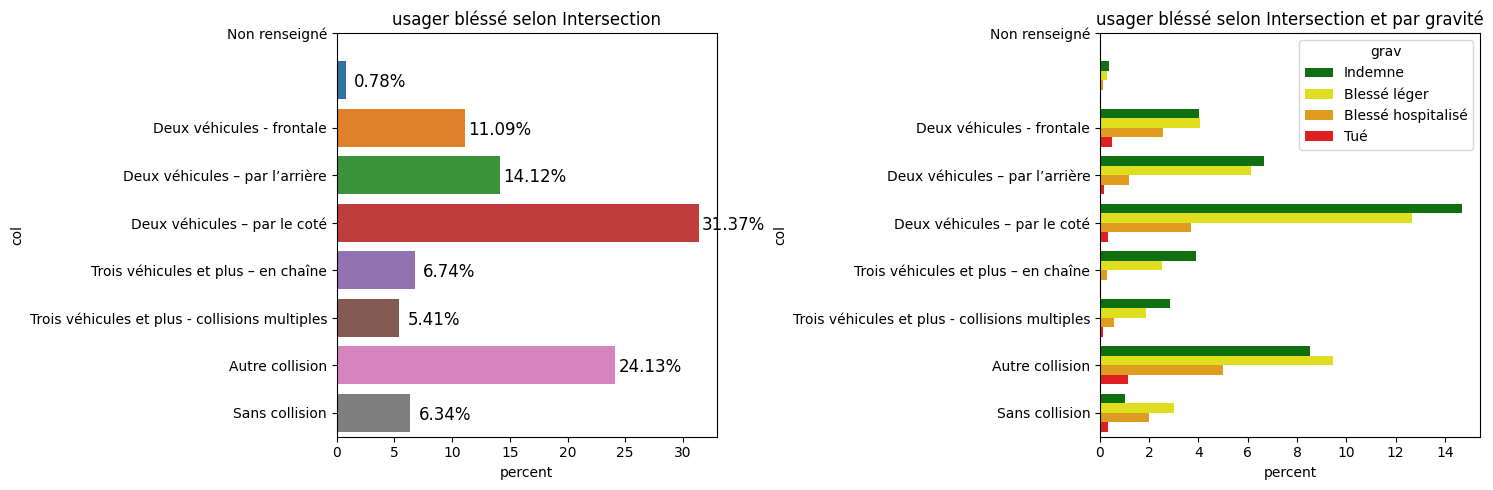


**** Test chi-2 ****
Test chi2 ( col , grav ) p-value : 0.0
Potentiel Correlation entre : col et grav Coef Cramér-V : 0.15244391389195536


In [19]:

print("Taux de NA :",df_grav.col.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.col==-1].col.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y='col',stat='percent',ax=axs[0],hue='col',palette='tab10',legend=False)

sns.countplot(data=df_grav,y='col',hue='grav',stat='percent',ax=axs[1]
             ,palette=grav_palette,hue_order=grav_order)

axs[0].set_title("usager bléssé selon Intersection")
axs[1].set_title("usager bléssé selon Intersection et par gravité")

col_code=[-1,1,2,3,4,5,6,7]
col_labels=['Non renseigné','Deux véhicules - frontale','Deux véhicules – par l’arrière','Deux véhicules – par le coté','Trois véhicules et plus – en chaîne',
            'Trois véhicules et plus - collisions multiples','Autre collision','Sans collision'
            ]

axs[0].set_yticks(col_code,col_labels)
axs[1].set_yticks(col_code,col_labels)

sns.move_legend(axs[1], "upper right")

for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')
    
fig.tight_layout()
#save_fig("repar_var_int")
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.col!=-1],"col","grav")


**Remarques:**
>* Les collisions frontales font plus de tués que par le coté
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre le type de collision et la gravité

### Catégorie route (cat)

Taux de NA : 0.0 %
Taux de non renseigne : 0.0 %


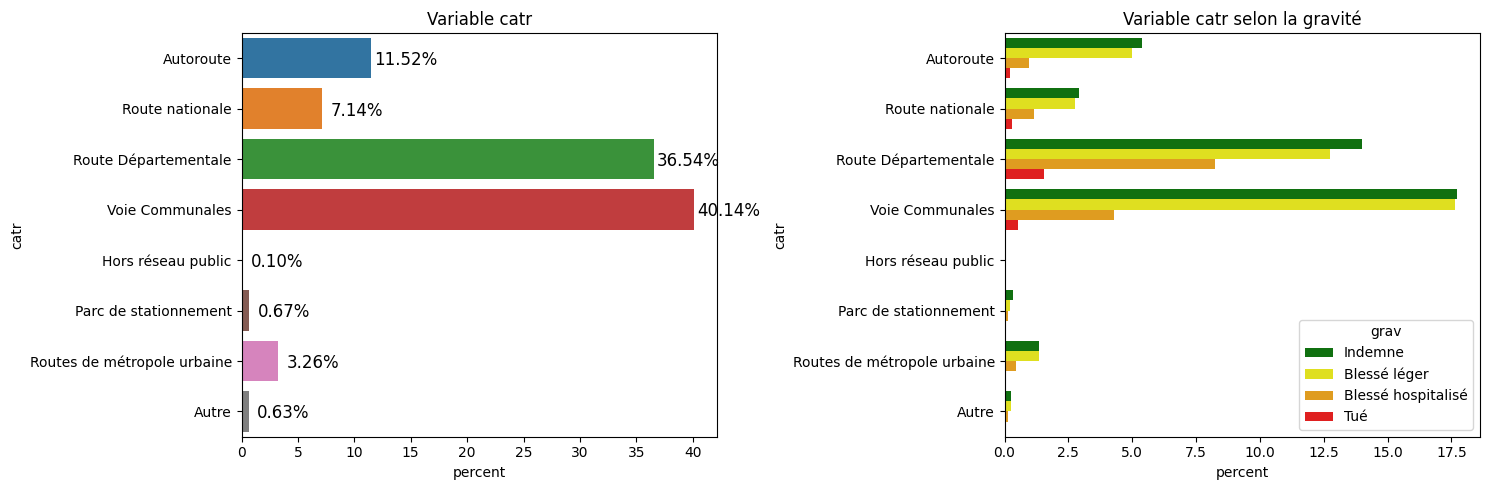


**** Test chi-2 ****
Test chi2 ( catr , grav ) p-value : 0.0
Potentiel Correlation entre : catr et grav Coef Cramér-V : 0.10912614251746797


In [20]:
print("Taux de NA :",df_grav.catr.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.catr==-1].catr.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y='catr',hue='catr',stat='percent',palette='tab10',legend=False,ax=axs[0])
sns.countplot(data=df_grav,y='catr',hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[0].set_title("Variable catr")
axs[1].set_title("Variable catr selon la gravité")

cat_code=['1','2','3','4','5','6','7','9']
cat_labels=['Autoroute','Route nationale','Route Départementale','Voie Communales','Hors réseau public','Parc de stationnement',
           'Routes de métropole urbaine','Autre']
axs[0].set_yticks(cat_code,cat_labels)
axs[1].set_yticks(cat_code,cat_labels)

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()

#save_fig("repar_var_cat_route")
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.catr!=-1],"catr","grav")


**Remarques:**
>* 77% des usagers accidentés sont sur les routes départementales et communales
>* Les blésses les graves sont sur les routes départementales suivi des voies communales
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la catégorie de la route et la gravité

### Régime de circulation (cir)

Taux de NA : 0.0 %
Taux de non renseigne : 5.312152508420816 %


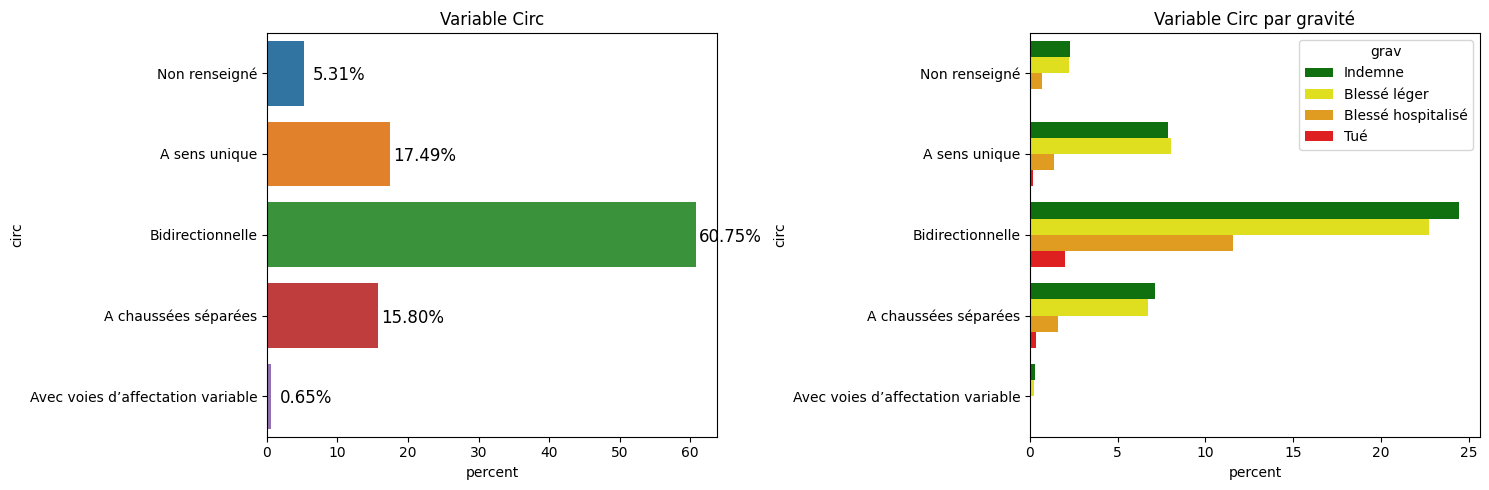


**** Test chi-2 ****
Test chi2 ( circ , grav ) p-value : 0.0
Potentiel Correlation entre : circ et grav Coef Cramér-V : 0.08613020588758404


In [21]:
print("Taux de NA :",df_grav.circ.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.circ==-1].circ.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

cir_code=['-1','1','2','3','4']
cir_labels=['Non renseigné','A sens unique','Bidirectionnelle','A chaussées séparées','Avec voies d’affectation variable']

sns.countplot(data=df_grav,y="circ",hue='circ',stat='percent',palette='tab10',ax=axs[0],legend=False)
axs[0].set_yticks(cir_code,cir_labels)
axs[0].set_title("Variable Circ")

sns.countplot(data=df_grav,y="circ",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])
axs[1].set_yticks(cir_code,cir_labels)
axs[1].set_title("Variable Circ par gravité")

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.circ!=-1],"circ","grav")

>

**Remarques:**
>* Plus de morts sur le régime de circulation bidirectionnelle
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre le régime de circulation et la gravité

### Existance d'une voie réservée ? (vosp)

Taux de NA : 0.0 %
Taux de non renseigne : 0.5732028672296072 %


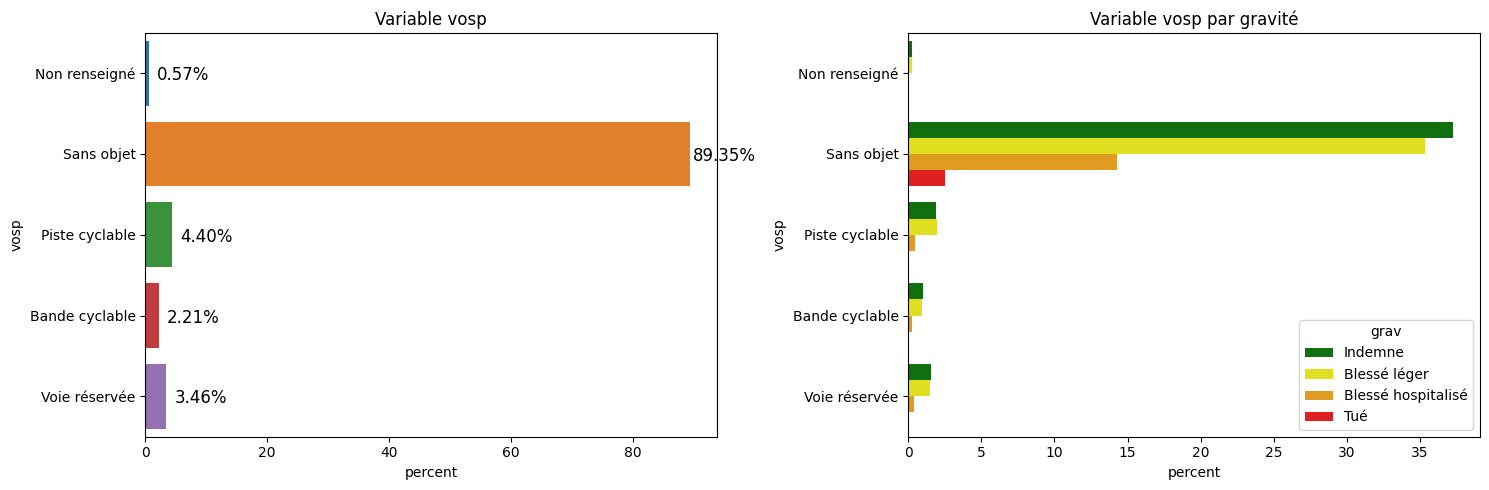


**** Test chi-2 ****
Test chi2 ( vosp , grav ) p-value : 0.0
Potentiel Correlation entre : vosp et grav Coef Cramér-V : 0.03275049766889228


In [22]:
print("Taux de NA :",df_grav.vosp.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.vosp==-1].vosp.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="vosp",hue='vosp',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable vosp")

sns.countplot(data=df_grav,y="vosp",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable vosp par gravité")

axs[0].set_yticks(['-1','0','1','2','3'], 
           ['Non renseigné','Sans objet','Piste cyclable','Bande cyclable','Voie réservée'])
axs[1].set_yticks(['-1','0','1','2','3'], 
           ['Non renseigné','Sans objet','Piste cyclable','Bande cyclable','Voie réservée'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.vosp!=-1],"vosp","grav")


**Remarques:**
>* Le test du chi-2 et le coefficient de Cramér révèlent une tres faible association entre la variable vosp et la gravité

### Profil en long décrit la déclivité de la route à l'endroit de l'accident (prof)

Taux de NA : 0.0 %
Taux de non renseigne : 0.015798524255798363 %


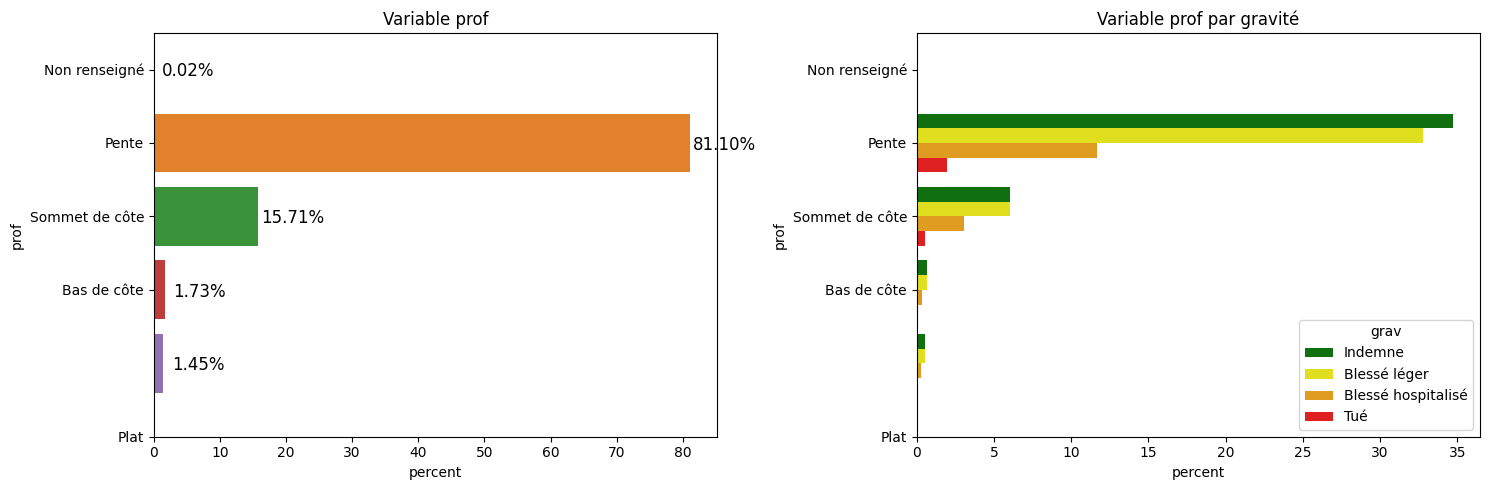


**** Test chi-2 ****
Test chi2 ( prof , grav ) p-value : 0.0
Potentiel Correlation entre : prof et grav Coef Cramér-V : 0.040007658810573436


In [23]:
print("Taux de NA :",df_grav.prof.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.prof==-1].prof.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="prof",hue='prof',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable prof")

sns.countplot(data=df_grav,y="prof",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable prof par gravité")

axs[0].set_yticks(['-1','0','1','2','3'], 
           ['Non renseigné','Plat','Pente','Sommet de côte','Bas de côte'])
axs[1].set_yticks(['-1','0','1','2','3'], 
           ['Non renseigné','Plat','Pente','Sommet de côte','Bas de côte'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.prof!=-1],"prof","grav")


**Remarques:**
>* Plus de tués sur les pentes
>* La variable est prof est très faiblement liée à la variable cible grav

### Tracé en plan (plan)

Taux de NA : 0.0 %
Taux de non renseigne : 0.01215271096599874 %


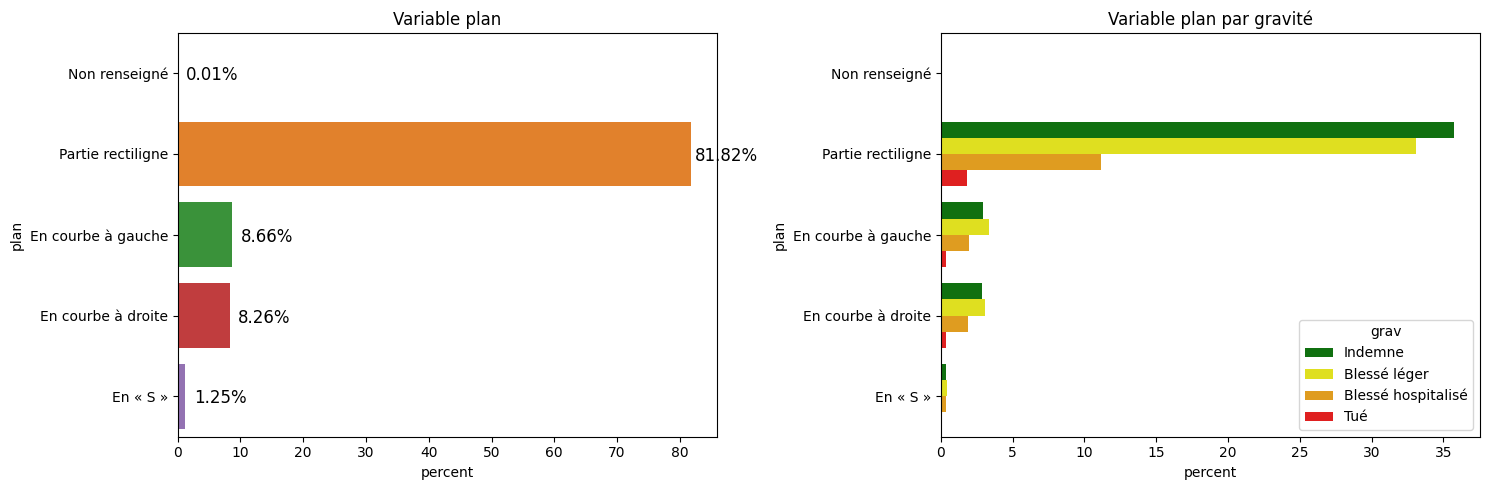


**** Test chi-2 ****
Test chi2 ( plan , grav ) p-value : 0.0
Potentiel Correlation entre : plan et grav Coef Cramér-V : 0.07224907472090808


In [24]:
print("Taux de NA :",df_grav.plan.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.plan==-1].plan.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="plan",hue='plan',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable plan")

sns.countplot(data=df_grav,y="plan",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable plan par gravité")

axs[0].set_yticks(['-1','1','2','3','4'], 
           ['Non renseigné','Partie rectiligne','En courbe à gauche','En courbe à droite','En « S »'])
axs[1].set_yticks(['-1','1','2','3','4'], 
           ['Non renseigné','Partie rectiligne','En courbe à gauche','En courbe à droite','En « S »'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()


## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.plan!=-1],"plan","grav")


**Remarques:**
>* La plus part des accidents et des tués se sur la parties rectiligne de la route
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable plan et la gravité

### Etat de la surface (surf)

Taux de NA : 0.0 %
Taux de non renseigne : 0.023090150835397606 %


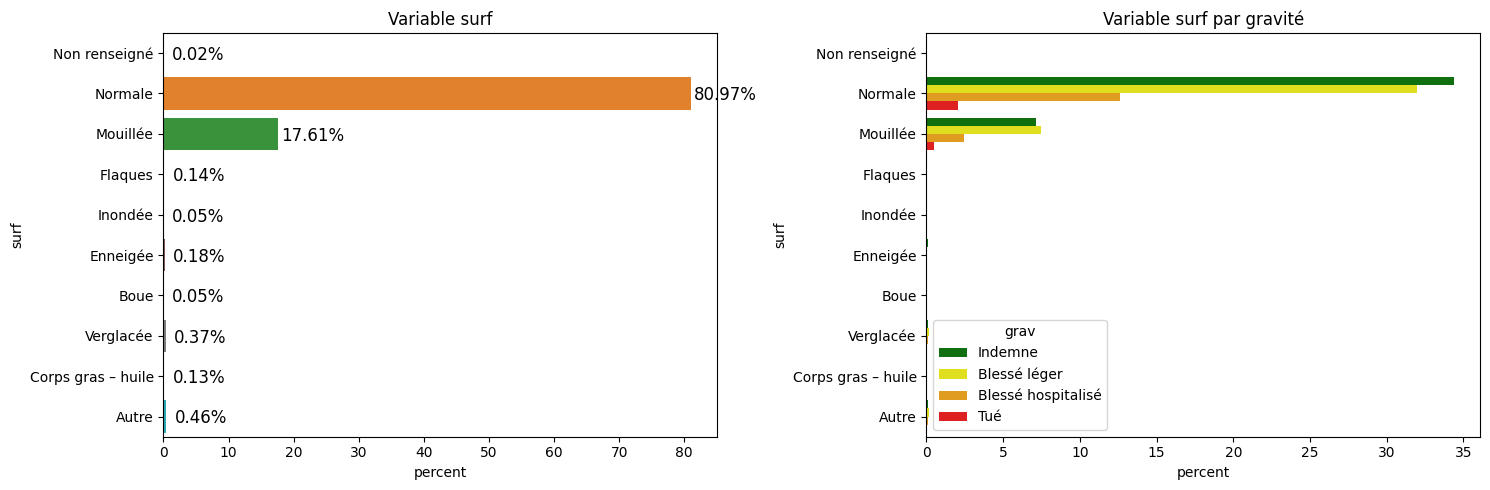


**** Test chi-2 ****
Test chi2 ( surf , grav ) p-value : 1.0329928122531363e-229
Potentiel Correlation entre : surf et grav Coef Cramér-V : 0.02798282426429694


In [25]:
print("Taux de NA :",df_grav.surf.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.surf==-1].surf.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="surf",hue='surf',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable surf")

sns.countplot(data=df_grav,y="surf",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable surf par gravité")

axs[0].set_yticks(['-1','1','2','3','4','5','6','7','8','9'], 
           ['Non renseigné','Normale','Mouillée','Flaques','Inondée','Enneigée','Boue','Verglacée','Corps gras – huile','Autre'])

axs[1].set_yticks(['-1','1','2','3','4','5','6','7','8','9'], 
           ['Non renseigné','Normale','Mouillée','Flaques','Inondée','Enneigée','Boue','Verglacée','Corps gras – huile','Autre'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
#save_fig("repar_var_surf")
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.surf!=-1],"surf","grav")


**Remarques:**
>* La plus part des accidents grave se font sur des surfaces normales
>* #Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable surf et la gravité

### Aménagement - Infrastructure (infra)

Taux de NA : 0.0 %
Taux de non renseigne : 0.9029464247737063 %


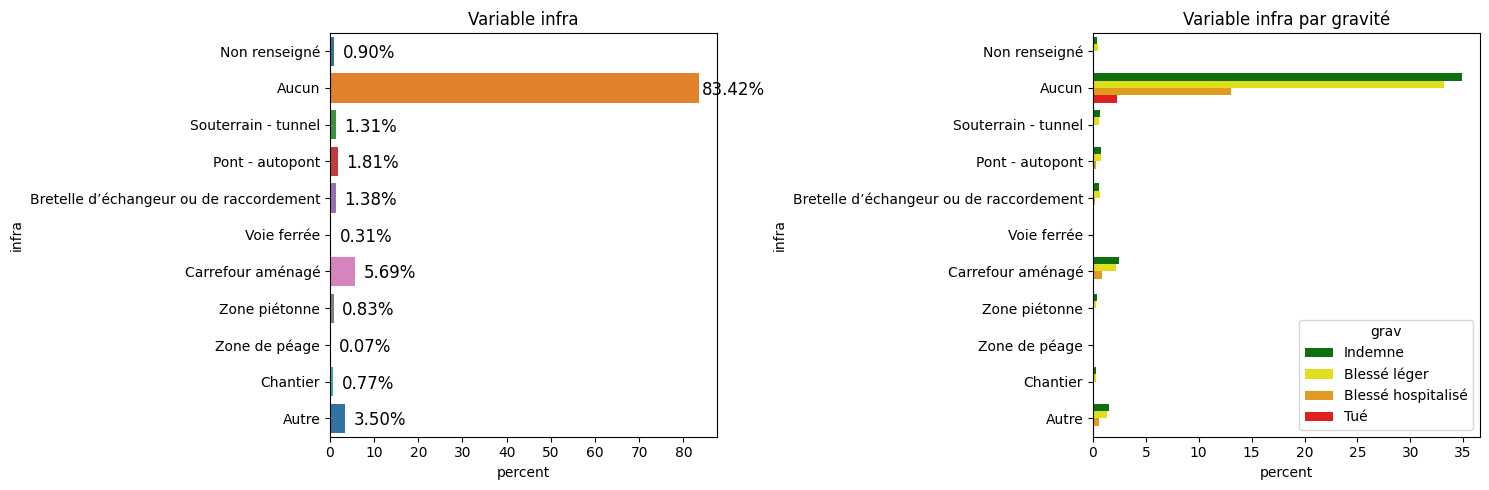


**** Test chi-2 ****
Test chi2 ( infra , grav ) p-value : 6.469926821225086e-212
Potentiel Correlation entre : infra et grav Coef Cramér-V : 0.02722042272895326


In [26]:
print("Taux de NA :",df_grav.infra.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.infra==-1].infra.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="infra",hue='infra',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable infra")

sns.countplot(data=df_grav,y="infra",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable infra par gravité")

axs[0].set_yticks(['-1','0','1','2','3','4','5','6','7','8','9'], 
           ['Non renseigné','Aucun','Souterrain - tunnel','Pont - autopont','Bretelle d’échangeur ou de raccordement','Voie ferrée','Carrefour aménagé','Zone piétonne','Zone de péage','Chantier','Autre'])

axs[1].set_yticks(['-1','0','1','2','3','4','5','6','7','8','9'], 
           ['Non renseigné','Aucun','Souterrain - tunnel','Pont - autopont','Bretelle d’échangeur ou de raccordement','Voie ferrée','Carrefour aménagé','Zone piétonne','Zone de péage','Chantier','Autre'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.infra!=-1],"infra","grav")


**Remarques:**
>* Le test du chi-2 et le coefficient de Cramér révèlent une très faible association entre la variable infra et la gravité

### Situation de l’accident (situ)

Taux de NA : 0.0 %
Taux de non renseigne : 0.05549738007806091 %


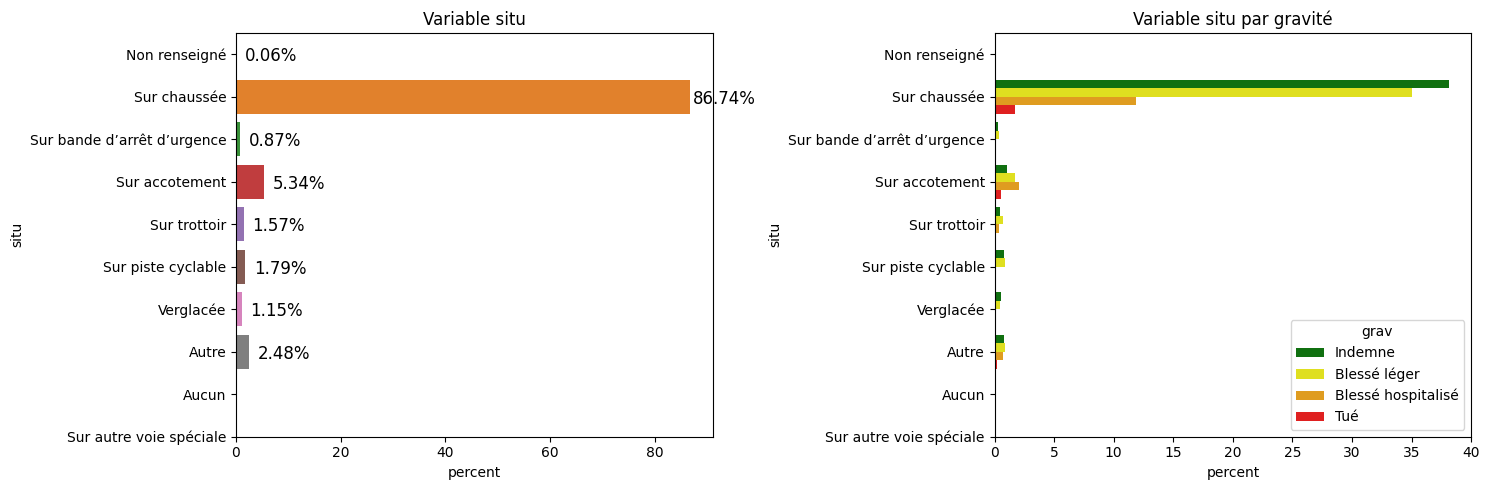


**** Test chi-2 ****
Test chi2 ( situ , grav ) p-value : 0.0
Potentiel Correlation entre : situ et grav Coef Cramér-V : 0.13023542542674776


In [27]:
print("Taux de NA :",df_grav.situ.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.situ==-1].situ.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="situ",hue='situ',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable situ")

sns.countplot(data=df_grav,y="situ",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable situ par gravité")

axs[0].set_yticks(['-1','0','1','2','3','4','5','6','7','8'], 
           ['Non renseigné','Aucun','Sur chaussée','Sur bande d’arrêt d’urgence','Sur accotement','Sur trottoir','Sur piste cyclable','Verglacée','Sur autre voie spéciale','Autre'])

axs[1].set_yticks(['-1','0','1','2','3','4','5','6','7','8'], 
           ['Non renseigné','Aucun','Sur chaussée','Sur bande d’arrêt d’urgence','Sur accotement','Sur trottoir','Sur piste cyclable','Verglacée','Sur autre voie spéciale','Autre'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.situ!=-1],"situ","grav")


**Remarques:**
>* Plus de  tués et d'accidenet sur la chaussé
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable situ et la gravité

### Sens de circulation (senc)

Taux de NA : 0.0 %
Taux de non renseigne : 0.3325791901028322 %


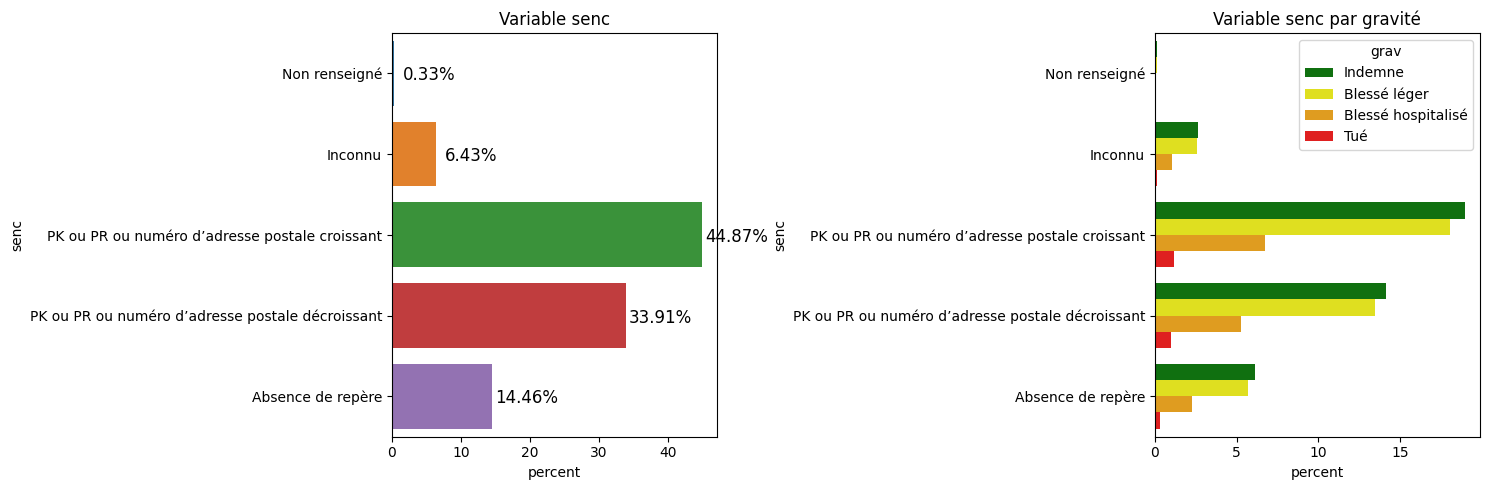


**** Test chi-2 ****
Test chi2 ( senc , grav ) p-value : 2.195091132986823e-48
Potentiel Correlation entre : senc et grav Coef Cramér-V : 0.012971192673012515


In [28]:
print("Taux de NA :",df_grav.senc.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.senc==-1].senc.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="senc",hue='senc',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable senc")

sns.countplot(data=df_grav,y="senc",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable senc par gravité")

axs[0].set_yticks(['-1','0','1','2','3'], 
           ['Non renseigné','Inconnu','PK ou PR ou numéro d’adresse postale croissant','PK ou PR ou numéro d’adresse postale décroissant','Absence de repère'])

axs[1].set_yticks(['-1','0','1','2','3'], 
           ['Non renseigné','Inconnu','PK ou PR ou numéro d’adresse postale croissant','PK ou PR ou numéro d’adresse postale décroissant','Absence de repère'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.senc!=-1],"senc","grav")


**Remarques:**
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre le sens de circulation et la gravité

### Catégorie du véhicule(catv)

Taux de NA : 0.0 %
Taux de non renseigne : 0.0026330873759663935 %


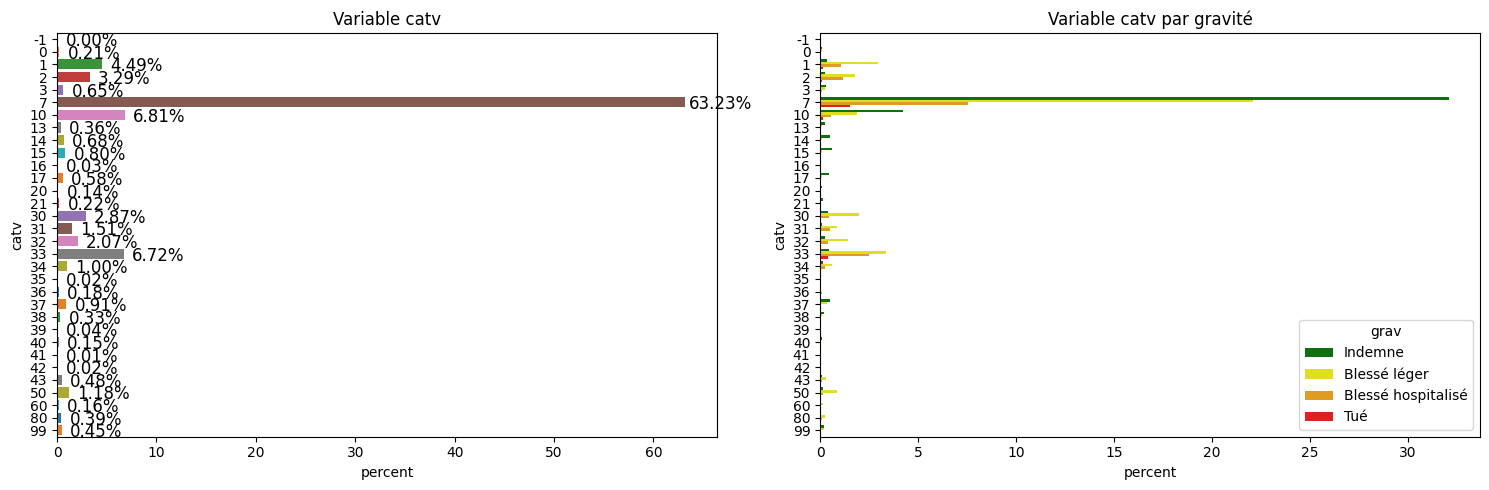


**** Test chi-2 ****
Test chi2 ( catv , grav ) p-value : 0.0
Potentiel Correlation entre : catv et grav Coef Cramér-V : 0.24506375362695088


In [29]:
print("Taux de NA :",df_grav.catv.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.catv==-1].catv.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="catv",hue='catv',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable catv")

sns.countplot(data=df_grav,y="catv",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable catv par gravité")

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.catv!=-1],"catv","grav")


**Remarques:**
>* 07 = Véhicule seul => plus d'accidents de morts se font avec des véhicules seuls 
>* 33 =  Motocyclette
>* 10 = VU seul 1,5T <= PTAC <= 3,5T
>* Le test du chi-2 et le coefficient de Cramér révèlent une association modérée entre la variable catv et la gravité

### Obstacle fixe heurté (obs)

Taux de NA : 0.0 %
Taux de non renseigne : 0.033014864790963244 %


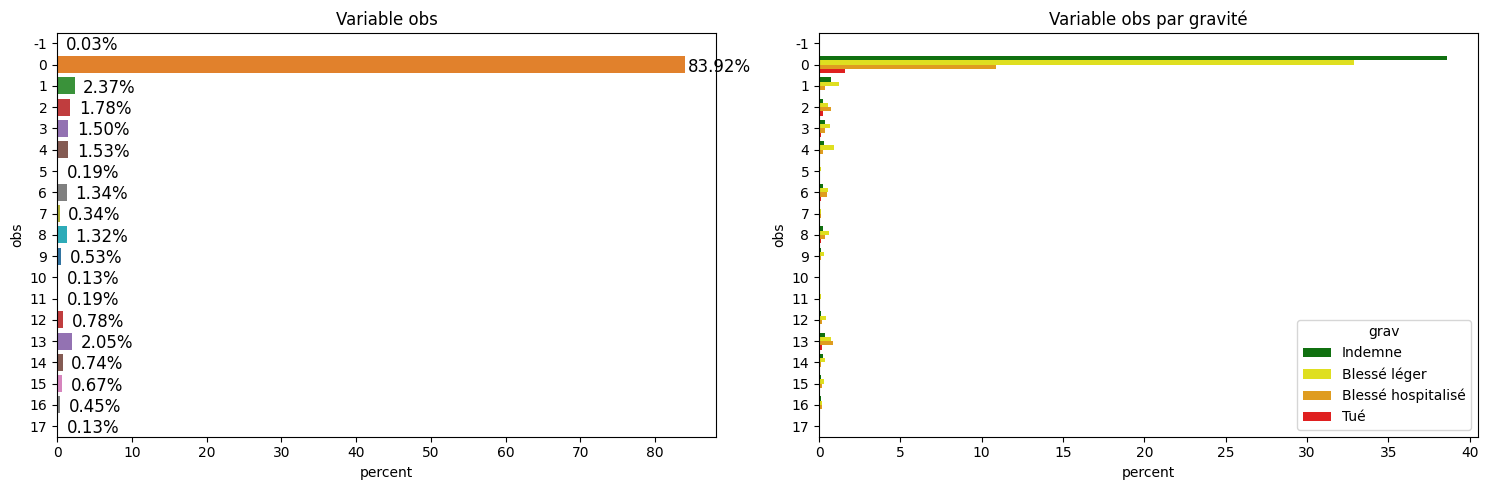


**** Test chi-2 ****
Test chi2 ( obs , grav ) p-value : 0.0
Potentiel Correlation entre : obs et grav Coef Cramér-V : 0.15829685437642735


In [30]:
print("Taux de NA :",df_grav.obs.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.obs==-1].obs.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="obs",hue='obs',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable obs")

sns.countplot(data=df_grav,y="obs",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable obs par gravité")

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.obs!=-1],"obs","grav")


**Remarques:**
>* 0 = Sans object => plus de 80% => pas de précision sur la signification
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable obs et la gravité

### Obstacle mobile heurté(obsm)

Taux de NA : 0.0 %
Taux de non renseigne : 0.046787937219095146 %


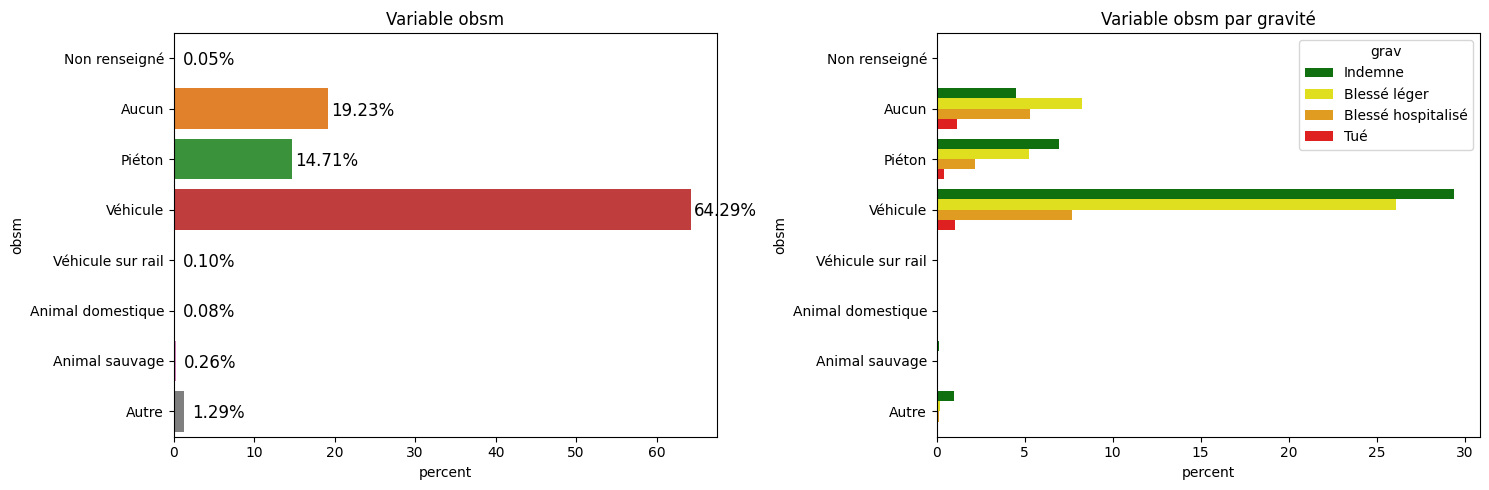


**** Test chi-2 ****
Test chi2 ( obsm , grav ) p-value : 0.0
Potentiel Correlation entre : obsm et grav Coef Cramér-V : 0.14314362675610454


In [31]:
print("Taux de NA :",df_grav.obsm.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.obsm==-1].obsm.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="obsm",hue='obsm',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable obsm")

sns.countplot(data=df_grav,y="obsm",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable obsm par gravité")

axs[0].set_yticks(['-1','0','1','2','4','5','6','9'], 
           ['Non renseigné','Aucun','Piéton','Véhicule','Véhicule sur rail','Animal domestique','Animal sauvage','Autre'])

axs[1].set_yticks(['-1','0','1','2','4','5','6','9'], 
           ['Non renseigné','Aucun','Piéton','Véhicule','Véhicule sur rail','Animal domestique','Animal sauvage','Autre'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.obsm!=-1],"obsm","grav")


**Remarques:**
>* La plus part des tués se font san aucun objet mobile ou avec un véhicule mobile suivit des piétons
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable obsm et la gravité

### Point de choc initial (choc)

Taux de NA : 0.0 %
Taux de non renseigne : 0.0421293980154623 %


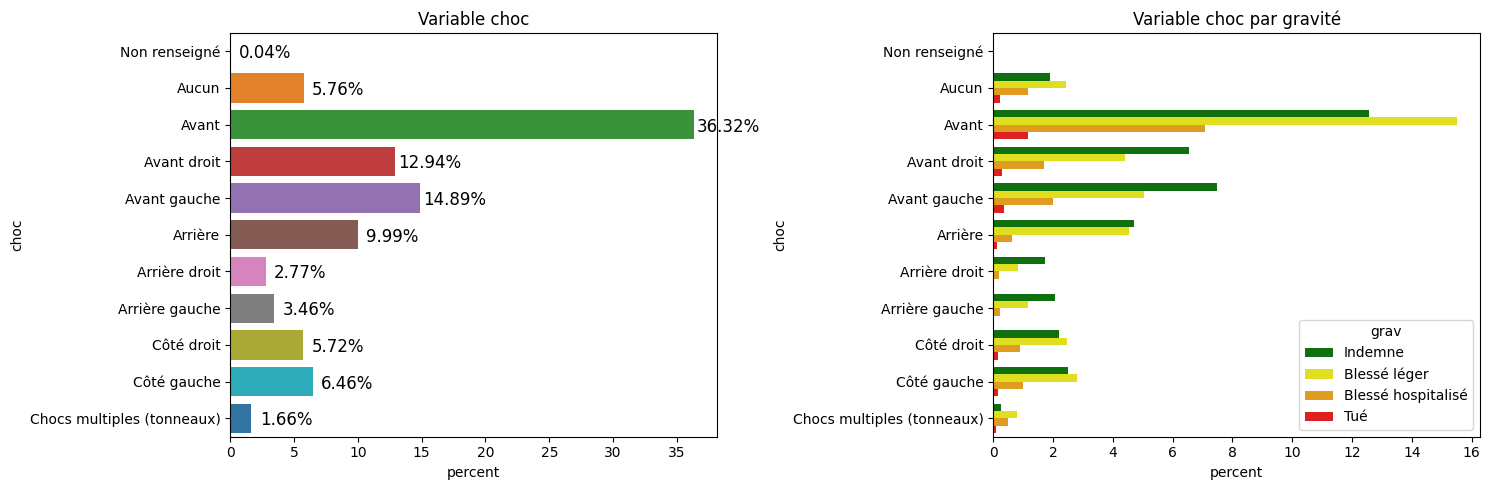


**** Test chi-2 ****
Test chi2 ( choc , grav ) p-value : 0.0
Potentiel Correlation entre : choc et grav Coef Cramér-V : 0.12232561977730465


In [32]:
print("Taux de NA :",df_grav.choc.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.choc==-1].choc.count()*100/df_grav.shape[0],"%")


fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="choc",hue='choc',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable choc")

sns.countplot(data=df_grav,y="choc",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable choc par gravité")

axs[0].set_yticks(['-1','0','1','2','3','4','5','6','7','8','9'], 
           ['Non renseigné','Aucun','Avant','Avant droit','Avant gauche','Arrière','Arrière droit','Arrière gauche','Côté droit','Côté gauche',
            'Chocs multiples (tonneaux)'])
axs[1].set_yticks(['-1','0','1','2','3','4','5','6','7','8','9'], 
           ['Non renseigné','Aucun','Avant','Avant droit','Avant gauche','Arrière','Arrière droit','Arrière gauche','Côté droit','Côté gauche',
            'Chocs multiples (tonneaux)'])
# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()


## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.choc!=-1],"choc","grav")



**Remarques:**
>* Point de choc avant provoque plus de blessés et de morts
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable choc et la gravité

### Manoeuvre principale avant l’accident (manv)

Taux de NA : 0.0 %
Taux de non renseigne : 0.02997668704946356 %


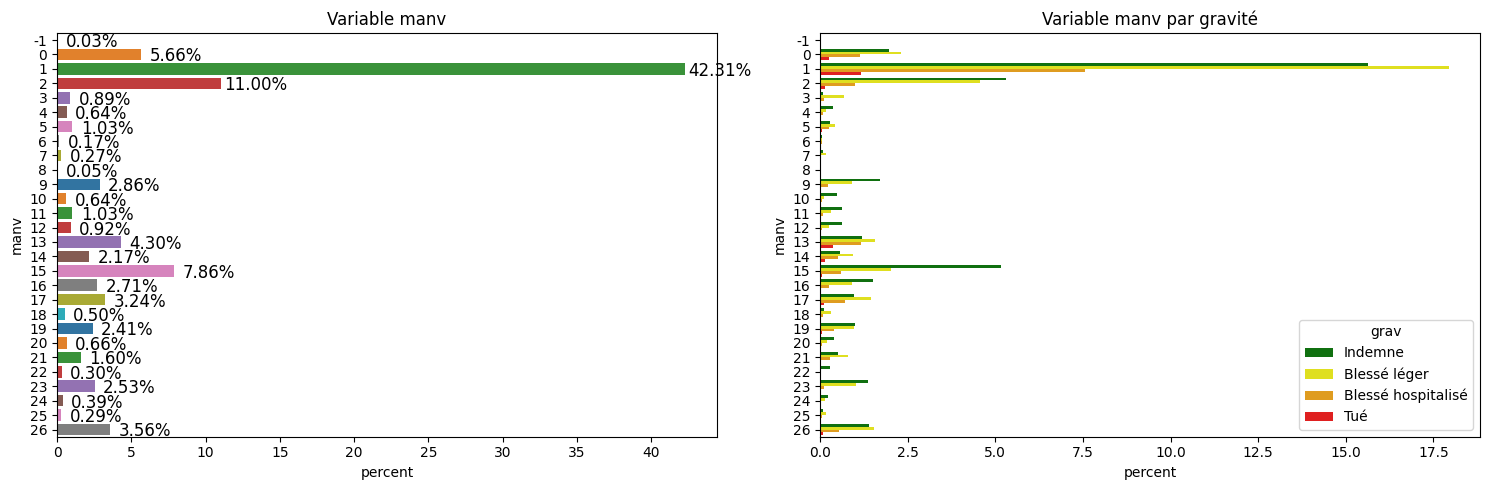


**** Test chi-2 ****
Test chi2 ( manv , grav ) p-value : 0.0
Potentiel Correlation entre : manv et grav Coef Cramér-V : 0.16236986057066963


In [33]:
print("Taux de NA :",df_grav.manv.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.manv==-1].manv.count()*100/df_grav.shape[0],"%")


fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="manv",hue='manv',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable manv")

sns.countplot(data=df_grav,y="manv",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable manv par gravité")

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.manv!=-1],"manv","grav")


**Remarques:**
>* 42% => 1 – Sans changement de direction : la plus des accidents graves se font san changement de direction
>* 11% => 2 – Même sens, même file
>* 05% => 15 – Tournant A gauche
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable manv et la gravité

### Type de motorisation du véhicule (motor)

Taux de NA : 0.0 %
Taux de non renseigne : 0.19788664356301283 %


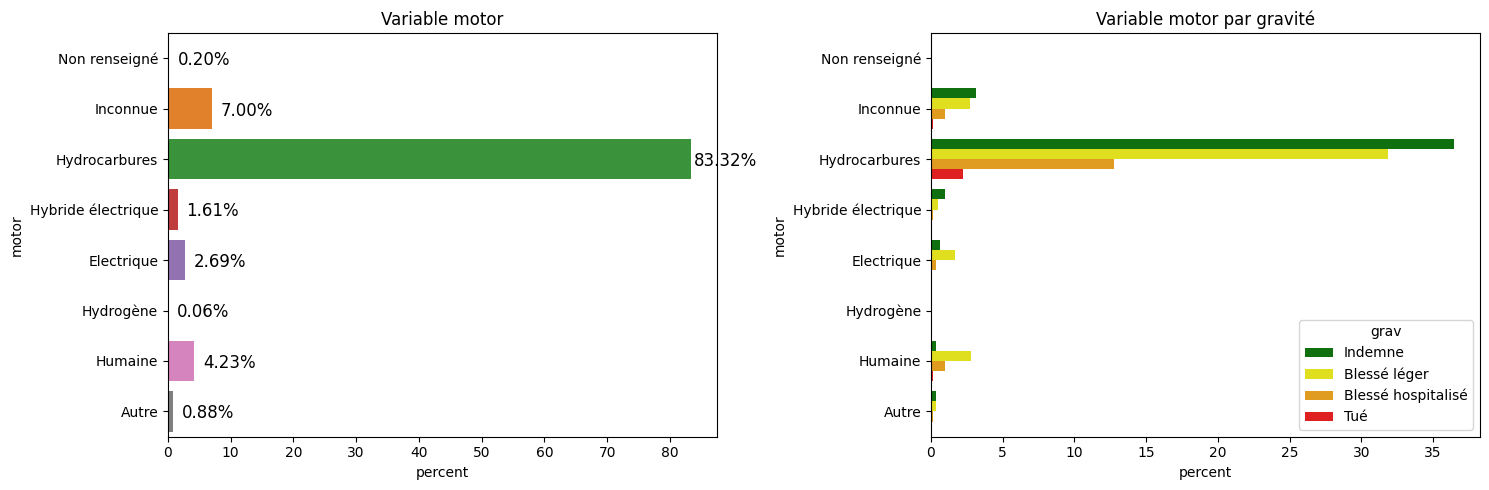


**** Test chi-2 ****
Test chi2 ( motor , grav ) p-value : 0.0
Potentiel Correlation entre : motor et grav Coef Cramér-V : 0.09970843793191994


In [34]:
print("Taux de NA :",df_grav.motor.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.motor==-1].motor.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="motor",hue='motor',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable motor")

sns.countplot(data=df_grav,y="motor",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable motor par gravité")

axs[0].set_yticks(['-1','0','1','2','3','4','5','6'], 
           ['Non renseigné','Inconnue','Hydrocarbures','Hybride électrique','Electrique','Hydrogène','Humaine','Autre'])

axs[1].set_yticks(['-1','0','1','2','3','4','5','6'], 
           ['Non renseigné','Inconnue','Hydrocarbures','Hybride électrique','Electrique','Hydrogène','Humaine','Autre'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.motor!=-1],"motor","grav")


**Remarques:**
>* Les voitures roulants en hydrocarbures representent la majorité des véhicules
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable motor et la gravité

### Place occupée dans le véicule (place)

Taux de NA : 0.0 %
Taux de non renseigne : 0.0006076355482999371 %


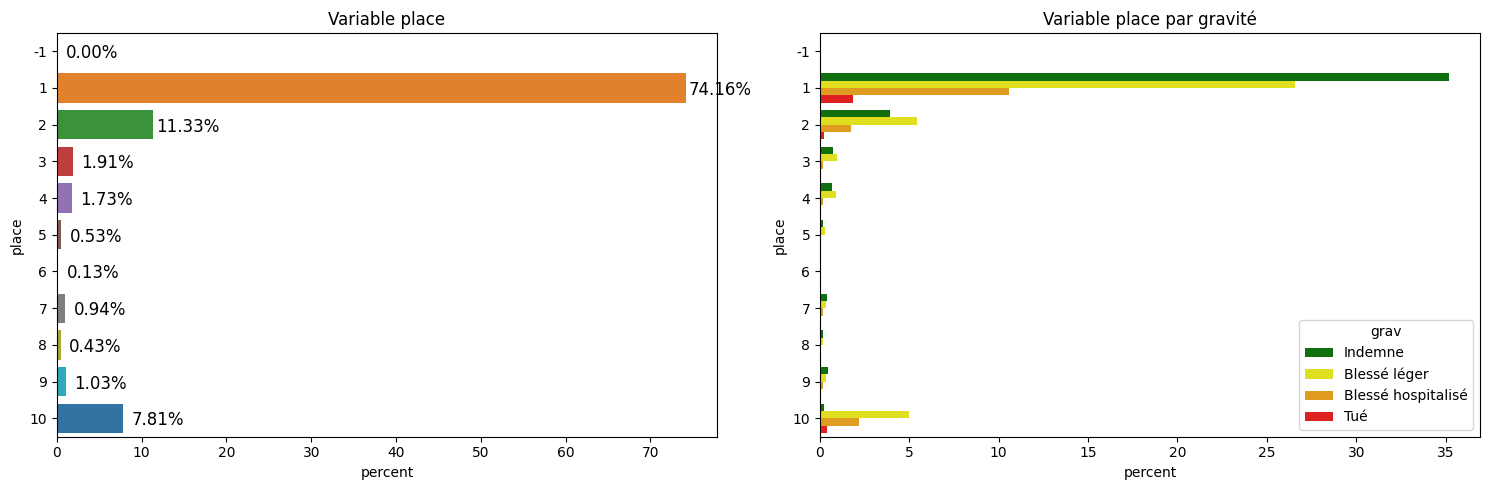


**** Test chi-2 ****
Test chi2 ( place , grav ) p-value : 0.0
Potentiel Correlation entre : place et grav Coef Cramér-V : 0.1466437414175102


In [35]:
print("Taux de NA :",df_grav.place.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.place==-1].place.count()*100/df_grav.shape[0],"%")


fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="place",hue='place',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable place")

sns.countplot(data=df_grav,y="place",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable place par gravité")


# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.place!=-1],"place","grav")


**Remarques:**
>* 1 - Place conducteur : Est le plus meurtrière
>* 2 - Place du passager
>* 10 - Pieton
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable place et la gravité

###  Catégorie d'usager (catu)

Taux de NA : 0.0 %
Taux de non renseigne : 0.0 %


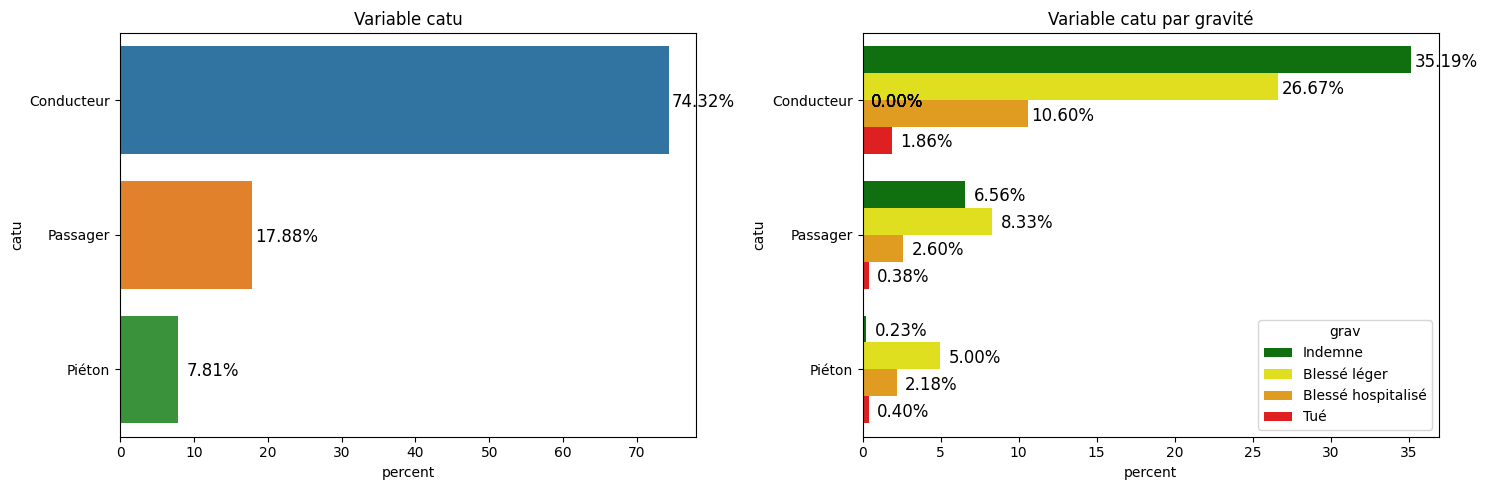


**** Test chi-2 ****
Test chi2 ( catu , grav ) p-value : 0.0
Potentiel Correlation entre : catu et grav Coef Cramér-V : 0.17549054018863602


In [36]:
print("Taux de NA :",df_grav.catu.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.catu==-1].catu.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="catu",hue='catu',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable catu")

sns.countplot(data=df_grav,y="catu",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable catu par gravité")

axs[0].set_yticks(['1','2','3'], 
           ['Conducteur','Passager','Piéton'])
axs[1].set_yticks(['1','2','3'], 
           ['Conducteur','Passager','Piéton'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

for p in axs[1].patches:
    axs[1].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()


## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.catu!=-1],"catu","grav")



**Remarques:**
>* Les conducteurs sont les plus tués
>* Un pieton à tres peu chance de s'en sortir idemme contrairement à un conducteur et un passger
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la varibale catu et la gravité

### Sexe (sexe)

Taux de NA : 0.0 %
Taux de non renseigne : 1.115213776313151 %


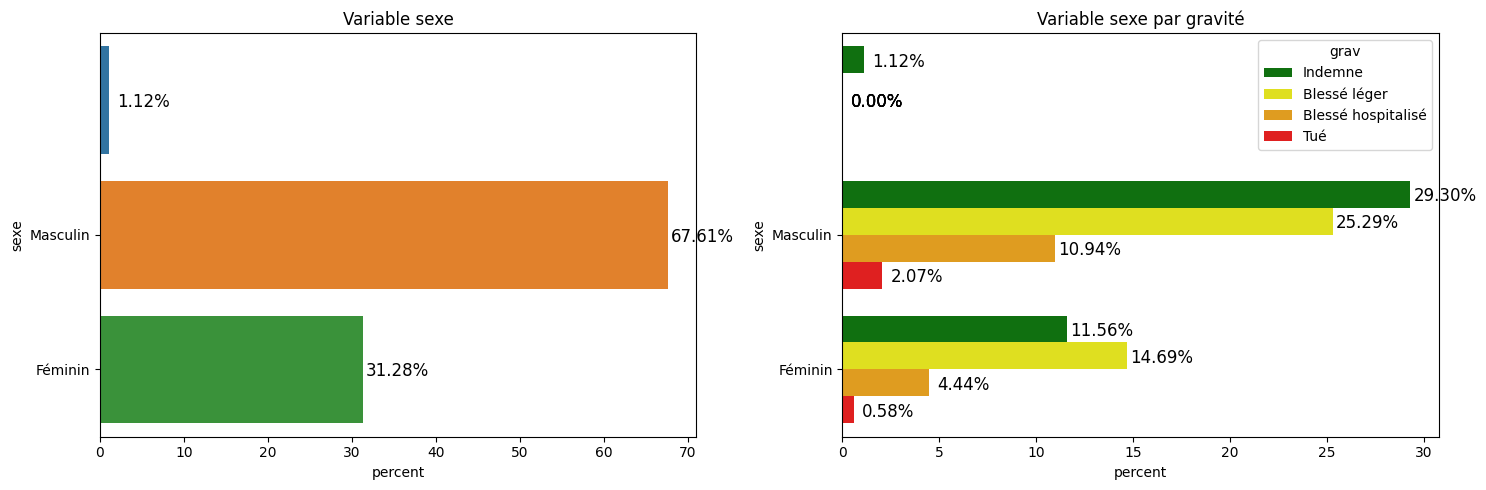


**** Test chi-2 ****
Test chi2 ( sexe , grav ) p-value : 0.0
Potentiel Correlation entre : sexe et grav Coef Cramér-V : 0.09363646055351342


In [37]:
print("Taux de NA :",df_grav.sexe.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.sexe==-1].sexe.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="sexe",hue='sexe',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable sexe")

sns.countplot(data=df_grav,y="sexe",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable sexe par gravité")

axs[0].set_yticks(['1','2'], 
           ['Masculin','Féminin'])
axs[1].set_yticks(['1','2'], 
           ['Masculin','Féminin'])

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

for p in axs[1].patches:
    axs[1].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.sexe!=-1],"sexe","grav")



**Remarques:**
>* Les hommes sont les plus tués et sont les plus repréntés egalement
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre le sexe et la gravité

### Année de naissance de l'usager (an_nais) : Regroupement en classe d'age

Taux de NA : 1.1425573759866483 %
Taux de non renseigne : 0.0 %


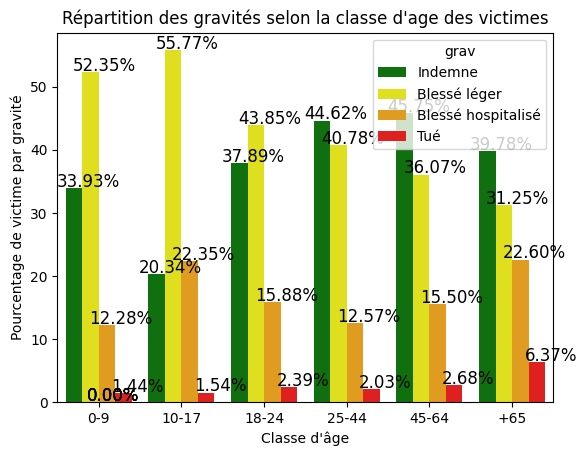


**** Test chi-2 ****
Test chi2 ( classe_age , grav ) p-value : 0.0
Potentiel Correlation entre : classe_age et grav Coef Cramér-V : 0.10357939267297016


In [38]:
print("Taux de NA :",df_grav.an_nais.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.an_nais==-1].an_nais.count()*100/df_grav.shape[0],"%")

df_age = df_grav.dropna(subset=["an_nais"]).copy()

df_age['age'] = df_age['an'].astype(int) - df_age['an_nais'].astype(int)

#création de classes d'ages à la place de la variable numérique age
bins = [0,9,17,24,44,64,999]
labels=[0,1,2,3,4,5]
df_age['classe_age'] = pd.cut(df_age['age'], bins=bins, labels=labels, include_lowest=True)


df_age_p = (df_age.groupby(['classe_age','grav'],observed=True).size()*100 / df_age.groupby('classe_age', observed=False).size()).reset_index(name='percent')
axs = sns.barplot(data = df_age_p, x='classe_age', y='percent', hue='grav',palette=grav_palette,hue_order=grav_order )
plt.xlabel('Classe d\'âge')
plt.ylabel('Pourcentage de victime par gravité')
plt.title('Répartition des gravités selon la classe d\'age des victimes');
plt.xticks(ticks = range(0,6),labels = ['0-9','10-17','18-24','25-44','45-64','+65']);



# Annotation
for p in axs.patches:
    axs.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(10, 1),
                textcoords='offset points')

plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_age,"classe_age","grav")




**Remarque:**

>* Les plus de 65 sont ceux qui ont la gravité la plus importante
>* Le test du chi-2 et le coefficient de Cramér révèlent une association modérée entre la classe d'age et la gravité

### Motif du déplacement au moment de l’accident(trajet)

Taux de NA : 0.0 %
Taux de non renseigne : 1.3367982062598613 %


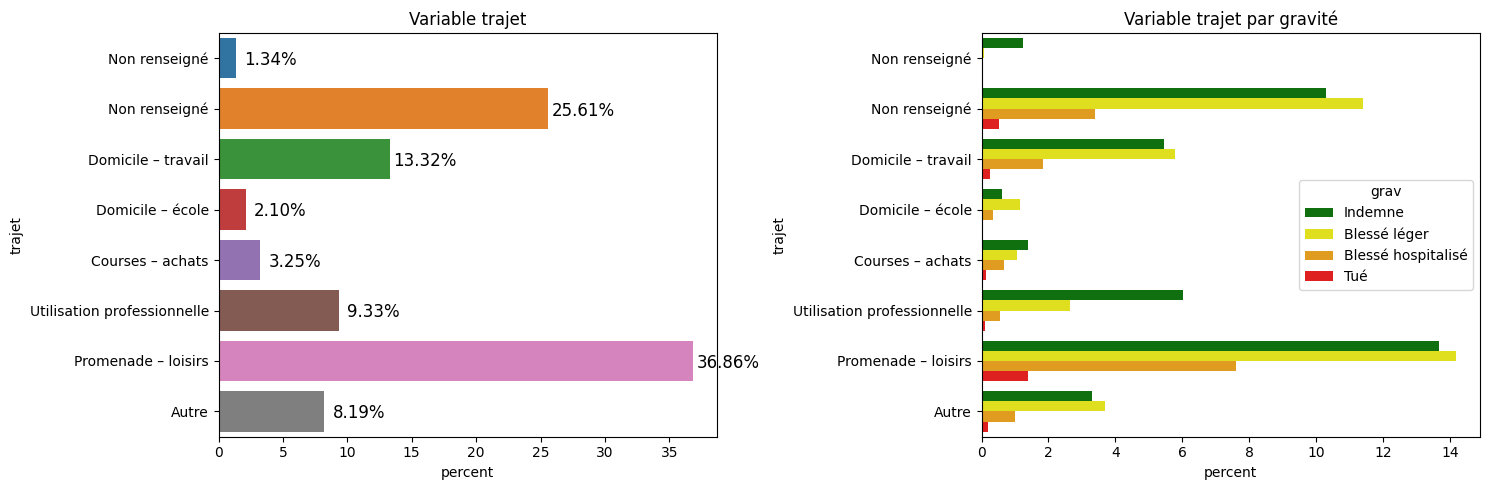


**** Test chi-2 ****
Test chi2 ( trajet , grav ) p-value : 0.0
Potentiel Correlation entre : trajet et grav Coef Cramér-V : 0.11474863541030905


In [39]:
print("Taux de NA :",df_grav.trajet.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.trajet==-1].trajet.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="trajet",hue='trajet',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable trajet")

sns.countplot(data=df_grav,y="trajet",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable trajet par gravité")

axs[0].set_yticks(['-1','0','1','2','3','4','5','9'], 
           ['Non renseigné','Non renseigné','Domicile – travail','Domicile – école','Courses – achats','Utilisation professionnelle','Promenade – loisirs','Autre'])

axs[1].set_yticks(['-1','0','1','2','3','4','5','9'], 
           ['Non renseigné','Non renseigné','Domicile – travail','Domicile – école','Courses – achats','Utilisation professionnelle','Promenade – loisirs','Autre'])


# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.trajet!=-1],"trajet","grav")



**Remarques:**
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre le trajet et la gravité

### Equipement de sécurité (secu1)

Taux de NA : 0.0 %
Taux de non renseigne : 1.077540372318555 %


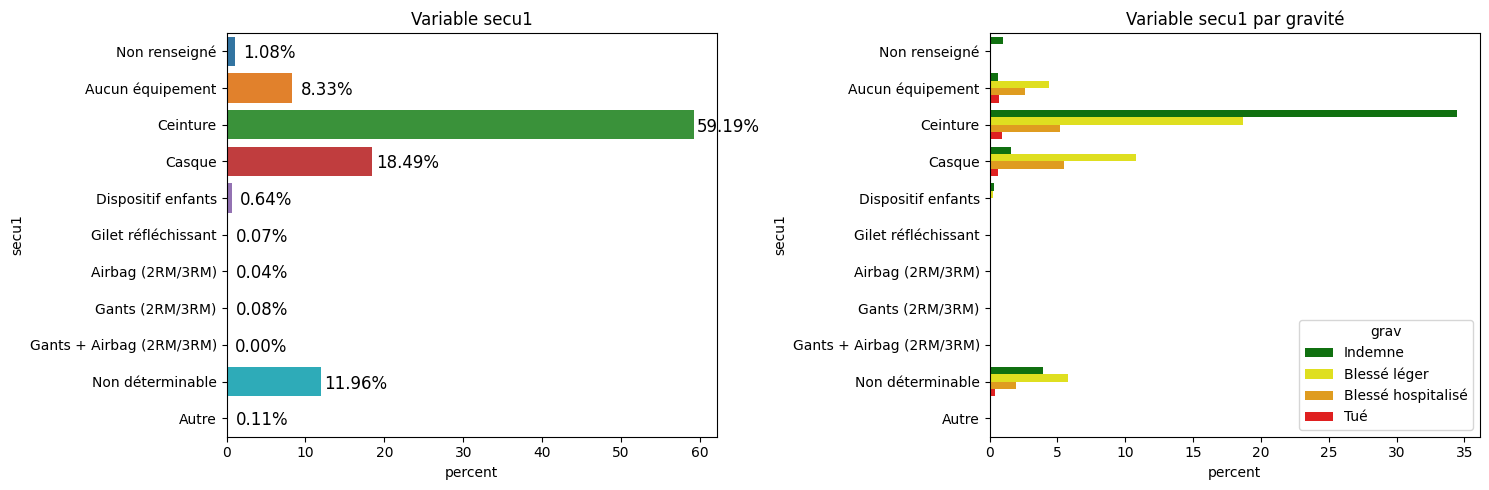


**** Test chi-2 ****
Test chi2 ( secu1 , grav ) p-value : 0.0
Potentiel Correlation entre : secu1 et grav Coef Cramér-V : 0.26872196302665763


In [40]:
print("Taux de NA :",df_grav.secu1.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.secu1==-1].secu1.count()*100/df_grav.shape[0],"%")


fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="secu1",hue='secu1',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable secu1")

sns.countplot(data=df_grav,y="secu1",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable secu1 par gravité")


secu1_code = ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
secu1_labels = [
    "Non renseigné",
    "Aucun équipement",
    "Ceinture",
    "Casque",
    "Dispositif enfants",
    "Gilet réfléchissant",
    "Airbag (2RM/3RM)",
    "Gants (2RM/3RM)",
    "Gants + Airbag (2RM/3RM)",
    "Non déterminable",
    "Autre"
]
axs[0].set_yticks(secu1_code,secu1_labels)
axs[1].set_yticks(secu1_code,secu1_labels)

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav.loc[df_grav.secu1!=-1],"secu1","grav")



**Remarques:**
>* Le test du chi-2 et le coefficient de Cramér révèlent une association modérée entre la variable secu1 et la gravité

> La plus part des accidents les plus graves se font quand même avec le port de la ceinture de sécurité 

### Equipement de sécurité (secu2)

Taux de NA : 0.0 %
Taux de non renseigne : 39.11187988260481 %


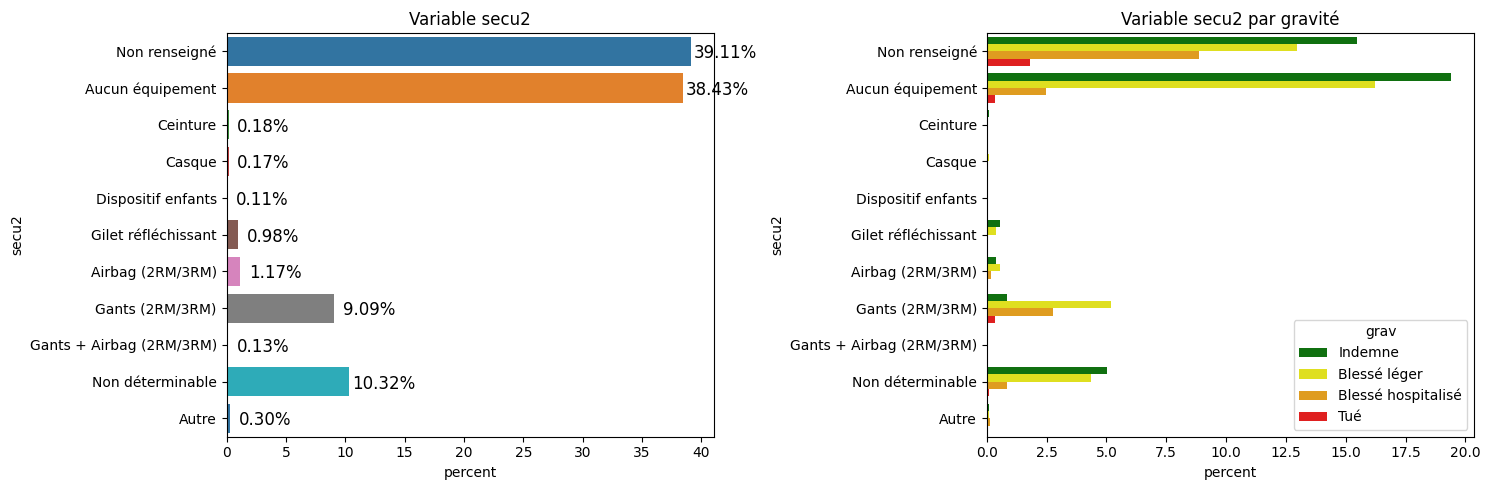


**** Test chi-2 ****
Test chi2 ( secu2 , grav ) p-value : 0.0
Potentiel Correlation entre : secu2 et grav Coef Cramér-V : 0.19065586866266887


In [41]:
print("Taux de NA :",df_grav.secu2.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.secu2==-1].secu2.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="secu2",hue='secu2',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable secu2")

sns.countplot(data=df_grav,y="secu2",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable secu2 par gravité")


secu2_code = ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
secu2_labels = [
    "Non renseigné",
    "Aucun équipement",
    "Ceinture",
    "Casque",
    "Dispositif enfants",
    "Gilet réfléchissant",
    "Airbag (2RM/3RM)",
    "Gants (2RM/3RM)",
    "Gants + Airbag (2RM/3RM)",
    "Non déterminable",
    "Autre"
]
axs[0].set_yticks(secu2_code,secu2_labels)
axs[1].set_yticks(secu2_code,secu2_labels)

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav,"secu2","grav")



**Remarques:**
>* Le test du chi-2 et le coefficient de Cramér révèlent une association modérée entre la variable secu2 et la gravité

### Equipement de sécurité (secu3)

Taux de NA : 0.0 %
Taux de non renseigne : 98.86716479278616 %


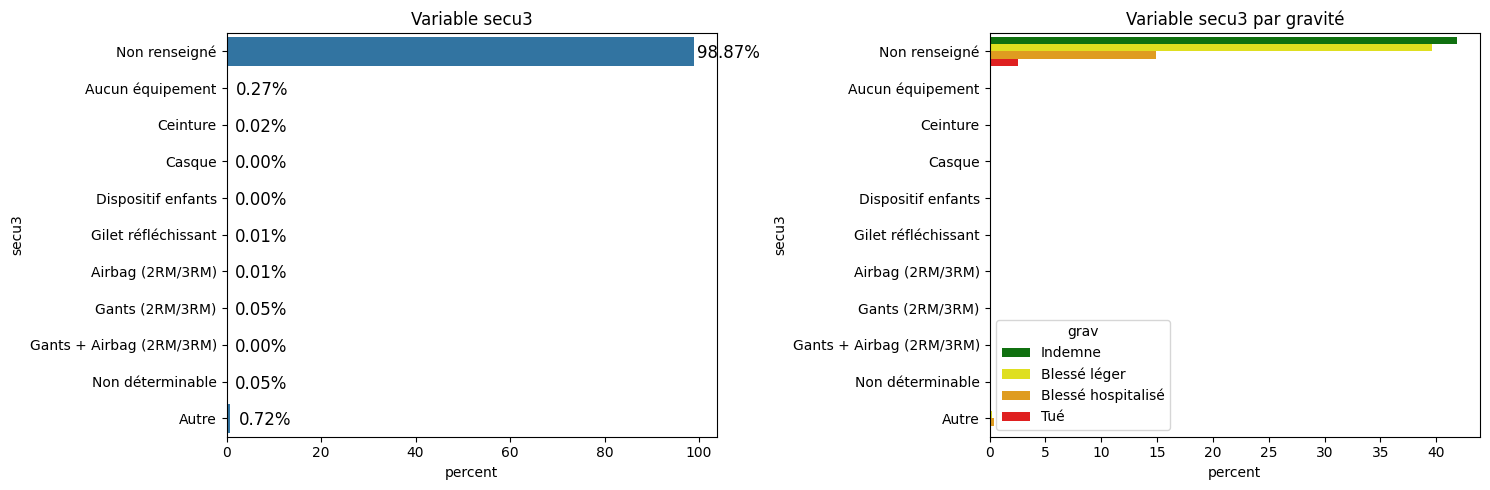


**** Test chi-2 ****
Test chi2 ( secu3 , grav ) p-value : 0.0
Potentiel Correlation entre : secu3 et grav Coef Cramér-V : 0.06875139703975013


In [42]:

print("Taux de NA :",df_grav.secu3.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.secu3==-1].secu3.count()*100/df_grav.shape[0],"%")


fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="secu3",hue='secu3',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable secu3")

sns.countplot(data=df_grav,y="secu3",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable secu3 par gravité")


secu3_code = ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
secu3_labels = [
    "Non renseigné",
    "Aucun équipement",
    "Ceinture",
    "Casque",
    "Dispositif enfants",
    "Gilet réfléchissant",
    "Airbag (2RM/3RM)",
    "Gants (2RM/3RM)",
    "Gants + Airbag (2RM/3RM)",
    "Non déterminable",
    "Autre"
]
axs[0].set_yticks(secu3_code,secu3_labels)
axs[1].set_yticks(secu3_code,secu3_labels)

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav,"secu3","grav")



**Remarques**
>* 98% sont pas renseignés
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable secu2 et la gravité

### Localisation du piéton (locp)

Taux de NA : 0.0 %
Taux de non renseigne : 43.840297174292154 %


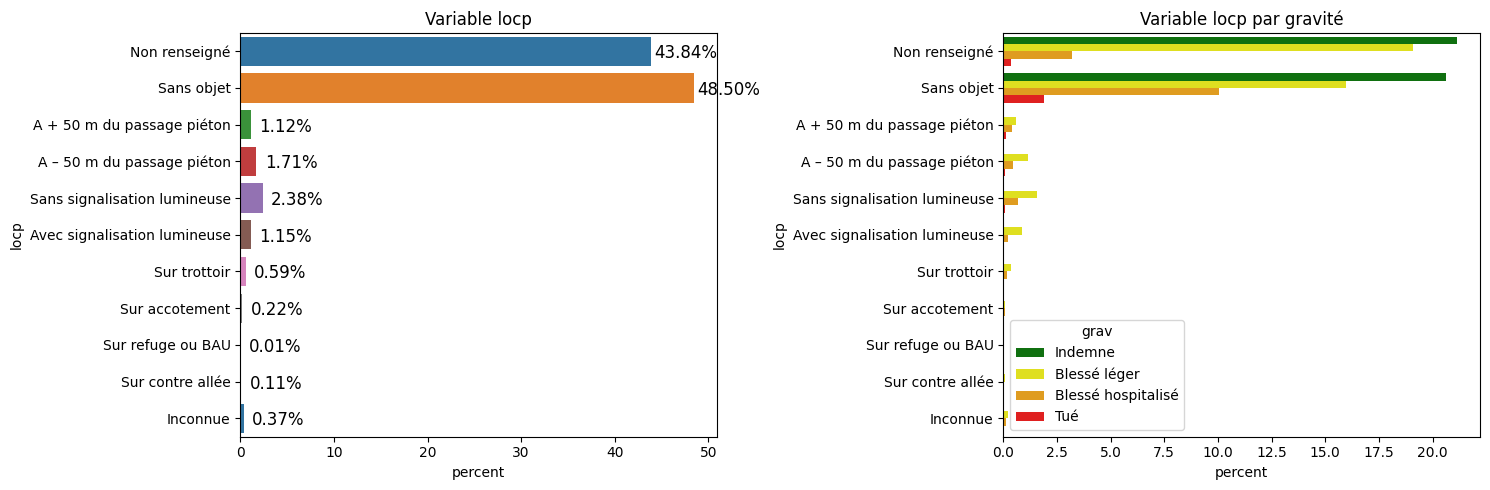


**** Test chi-2 ****
Test chi2 ( locp , grav ) p-value : 0.0
Potentiel Correlation entre : locp et grav Coef Cramér-V : 0.18432986491685888


In [43]:
print("Taux de NA :",df_grav.locp.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.locp==-1].locp.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="locp",hue='locp',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable locp")


sns.countplot(data=df_grav,y="locp",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable locp par gravité")


locp_code = ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
locp_labels = [
    "Non renseigné",
    "Sans objet",
    "A + 50 m du passage piéton",
    "A – 50 m du passage piéton",
    "Sans signalisation lumineuse",
    "Avec signalisation lumineuse",
    "Sur trottoir",
    "Sur accotement",
    "Sur refuge ou BAU",
    "Sur contre allée",
    "Inconnue"
]
axs[0].set_yticks(locp_code,locp_labels)
axs[1].set_yticks(locp_code,locp_labels)

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav,"locp","grav")


**Remarques:**
>* 43% sont pas renseignés
>* 48 % sont sans objets
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable locp et la gravité

### Action du piéton (actp)

Taux de NA : 0.0 %
Taux de non renseigne : 0.0 %


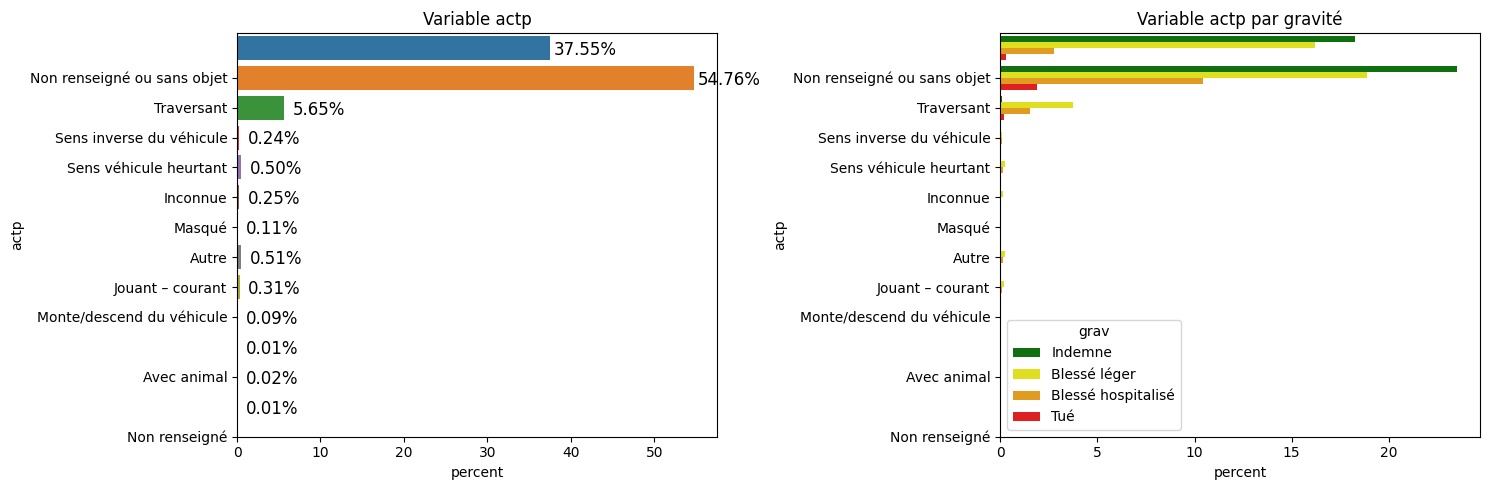


**** Test chi-2 ****
Test chi2 ( actp , grav ) p-value : 0.0
Potentiel Correlation entre : actp et grav Coef Cramér-V : 0.16991241976713523


In [44]:
print("Taux de NA :",df_grav.actp.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.actp==-1].actp.count()*100/df_grav.shape[0],"%")


fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="actp",hue='actp',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable actp")

sns.countplot(data=df_grav,y="actp",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable actp par gravité")


actp_code = ['-1', '0', '1', '2', '3', '4', '5', '6', '9','A','B']
actp_labels = [
    "Non renseigné",
    "Non renseigné ou sans objet",
    "Sens véhicule heurtant",
    "Sens inverse du véhicule",
    "Traversant",
    "Masqué",
    "Jouant – courant",
    "Avec animal",
    "Autre",
    "Monte/descend du véhicule",
    "Inconnue"
]
axs[0].set_yticks(actp_code,actp_labels)
axs[1].set_yticks(actp_code,actp_labels)

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()


## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav,"actp","grav")



**Remarques:**
>* 54% ne sont sans objet
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la variable actp et la gravité

### Le piéton accidenté était seul ou non (etatp)

Taux de NA : 0.0 %
Taux de non renseigne : 92.32698084125116 %


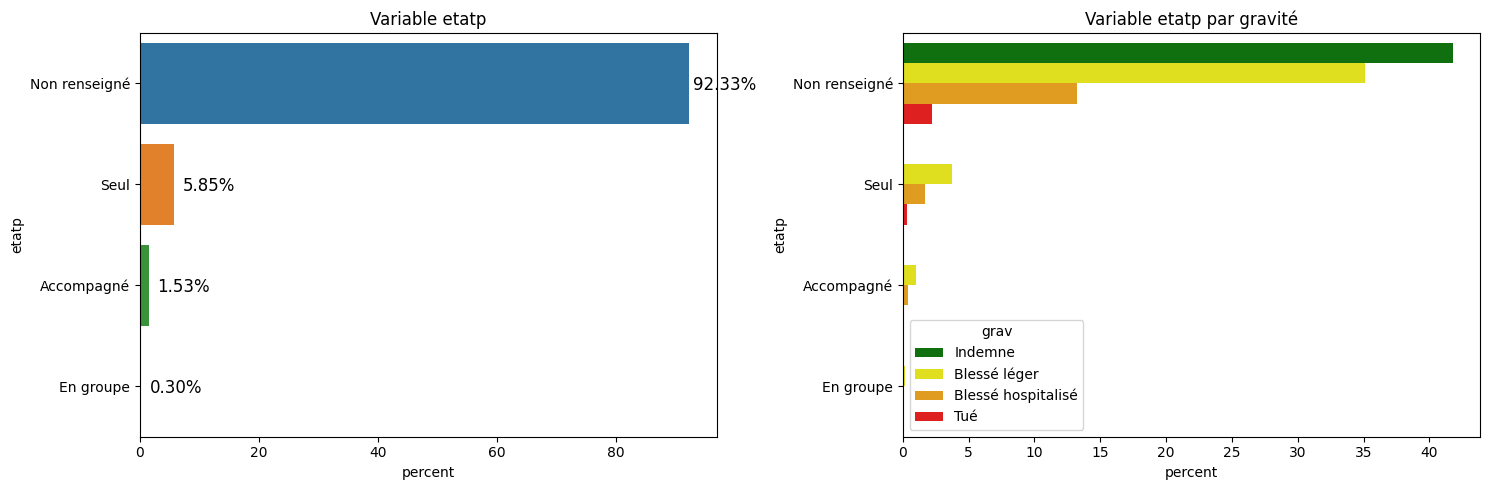


**** Test chi-2 ****
Test chi2 ( etatp , grav ) p-value : 0.0
Potentiel Correlation entre : etatp et grav Coef Cramér-V : 0.13334927439938626


In [45]:
print("Taux de NA :",df_grav.etatp.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de non renseigne :",df_grav.loc[df_grav.etatp==-1].etatp.count()*100/df_grav.shape[0],"%")

fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="etatp",hue='etatp',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable etatp")

sns.countplot(data=df_grav,y="etatp",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable etatp par gravité")


etatp_code = ['-1', '1', '2', '3']
etatp_labels = [
    "Non renseigné",
    "Seul",
    "Accompagné",
    "En groupe"
]

axs[0].set_yticks(etatp_code,etatp_labels)
axs[1].set_yticks(etatp_code,etatp_labels)

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

## Test chi2
print()
print("**** Test chi-2 ****")
test_chi2(df_grav,"etatp","grav")
#Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre l'année et la gravité


**Remarques:**
>* 92% sont pas renseignés
>* Le test du chi-2 et le coefficient de Cramér révèlent une faible association entre la varibales etatp et la gravité

### Adresse de l'accident (adr)
> Aucune annalyse

### Numéro de la route (voie)
> Aucune annalyse

### Indice de la voie (V1)
> Aucune annalyse

### Indice de la voie (V2)
> Aucune annalyse

## 2 Variables explicatives quantitatives

### Fonctions test de normalité

In [46]:
import scipy.stats as stats
import statsmodels.api as sm

def taux_na(df_p,var_name:str):
    print("Taux de NA :",df_p[var_name].isna().sum()*100/df_p.shape[0],"%")
    print("Taux de non renseigne :",df_p.loc[df_p[var_name]==-1][var_name].count()*100/df_p.shape[0],"%")

def test_normalite(data):
    print("**** Test de normalité ****")
    # Test de Kolmogorov-Smirnov
    stat, p_value = stats.kstest(data, 'norm')
    
    # Affichage des résultats
    print(f"Statistique de test : {stat}")
    print(f"p-value : {p_value}")
    
    # Interprétation
    if p_value > 0.05:
        print("Les données suivent une distribution normale")
    else:
        print("Les données ne suivent pas une distribution normale")


### Fonction plot d'une variable quantitative

In [47]:
def plot_variable_quantitative(df_p,var_name:str,plot_size=(10,8)):

    fig, axs = plt.subplots(ncols=2,nrows=2,figsize=plot_size)
    
    # Histogramme et estimation de la densité de probabilité
    sns.histplot(data=df_p, x=var_name,ax=axs[0,0],kde=True)
    axs[0,0].set_title(f"Histogramme et densité de la variable {var_name}")
    
    # Tracer un Q-Q plot
    sm.qqplot(df_p[var_name], line='45', fit=True,ax=axs[0,1])
    axs[0,1].set_title("Q-Q plot de la variable age")
    
    ## Distribution de l'age
    sns.boxplot(df_p,x=var_name,ax=axs[1,0])
    axs[1,0].set_title(f"Box plot de la variable {var_name}")
    
    ## Distribution de l'age selon la gravité
    sns.boxplot(df_p,x=var_name,hue='grav',hue_order=grav_order,ax=axs[1,1])
    axs[1,1].set_title(f"Box plot de la variable {var_name} selon la gravité")
    
    fig.tight_layout()
    
    plt.show()
    

### Année de naissance de l'usager (an_nais)

Taux de NA : 1.1425573759866483 %
Taux de non renseigne : 0.0 %


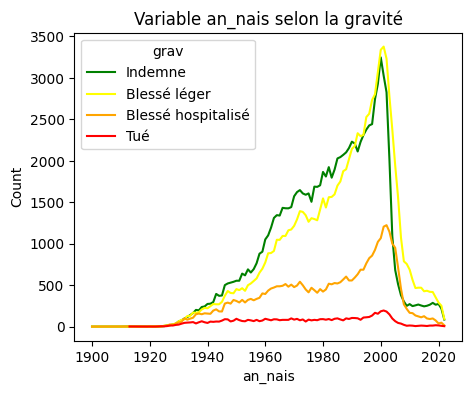

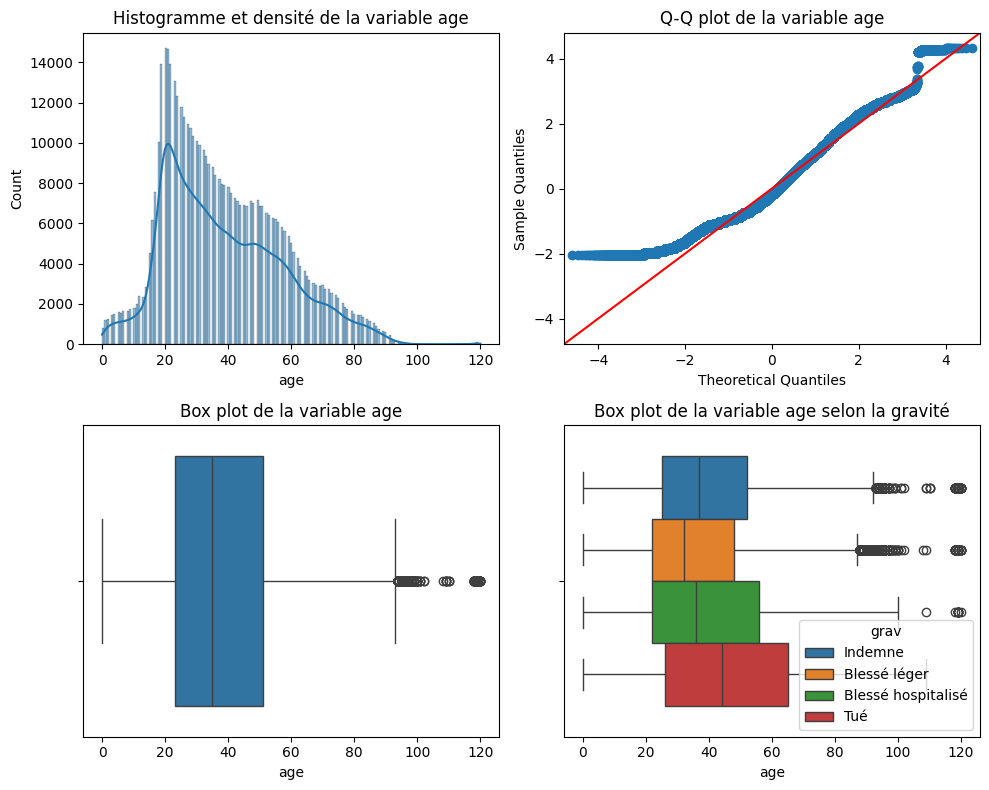

**** Test de normalité ****
Statistique de test : 0.9919564722877464
p-value : 0.0
Les données ne suivent pas une distribution normale


In [48]:

taux_na(df_grav,'an_nais')

an_nais = df_grav.groupby(['an_nais','grav'])['id_usager'].count().reset_index(name="Count")
plt.subplots(figsize=(5, 4))

#Courbe
ax = sns.lineplot(data=an_nais,x='an_nais',y='Count',palette=grav_palette,hue='grav',hue_order=grav_order)
ax.set_title("Variable an_nais selon la gravité")

plt.show()

plot_variable_quantitative(df_age,"age")

test_normalite(df_age['age'])

**Remarques:**
>* Peut importe la gravité on constate un pic sur l'an 2000
>* L'age ne suit pas une distribution normale
>* On constate des outliers de 120 ans !!!
>* La médiane des tués est la plus haute et sans outliers !!


### Nombre de voie (nbv)

Taux de NA : 0.0 %
Taux de non renseigne : 0.0 %


count    493715.000000
mean          2.456723
std           1.426313
min          -1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          12.000000
Name: nbv, dtype: float64

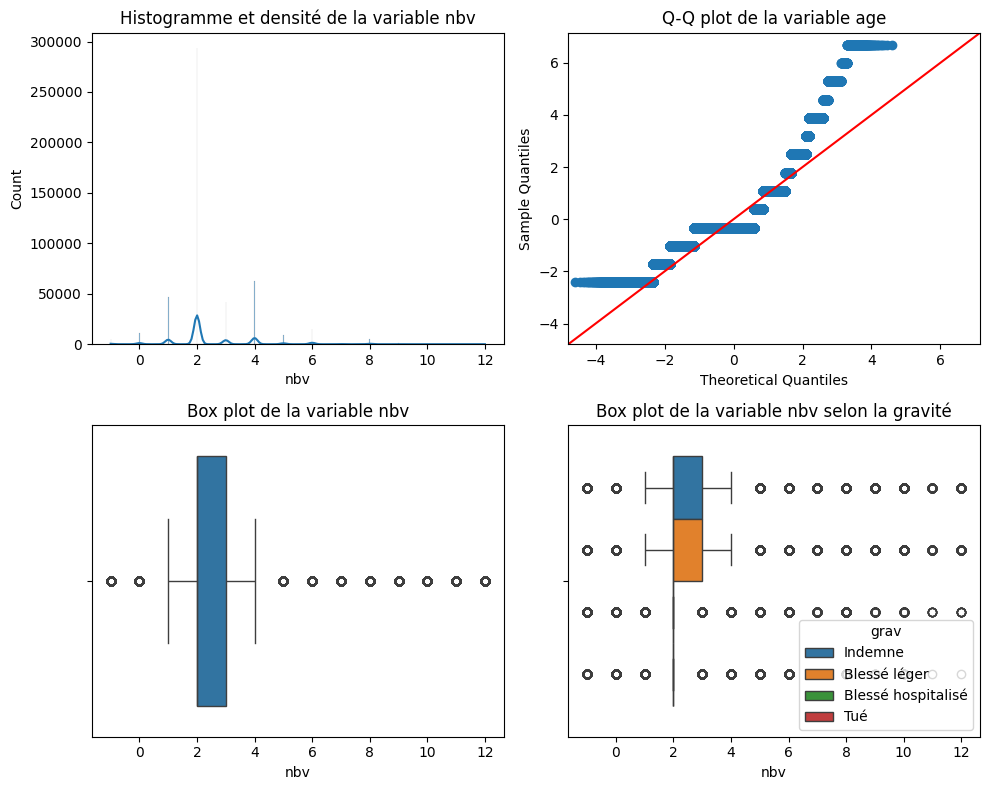

**** Test de normalité ****
Statistique de test : 0.8501745310659079
p-value : 0.0
Les données ne suivent pas une distribution normale


In [49]:
df_nbv =df_grav.copy()

taux_na(df_nbv,'nbv')

## Correction
df_nbv['nbv']=df_nbv.loc[~(df_nbv.nbv=="#ERREUR")].nbv.astype(int)
df_nbv= df_nbv.dropna(subset=['nbv'])

#STAT
display(df_nbv.nbv.describe())

plot_variable_quantitative(df_nbv,"nbv")

test_normalite(df_nbv['nbv'])

del df_nbv

**Remarques:**
 >* Pas de valeurs aberantes mais des valeurs extremes car on peut trouver des autoroutes à 12 voies
 >* Par contre les valeurs -1 et 0 sont des valeurs abérantes car une route à au minimun une voie


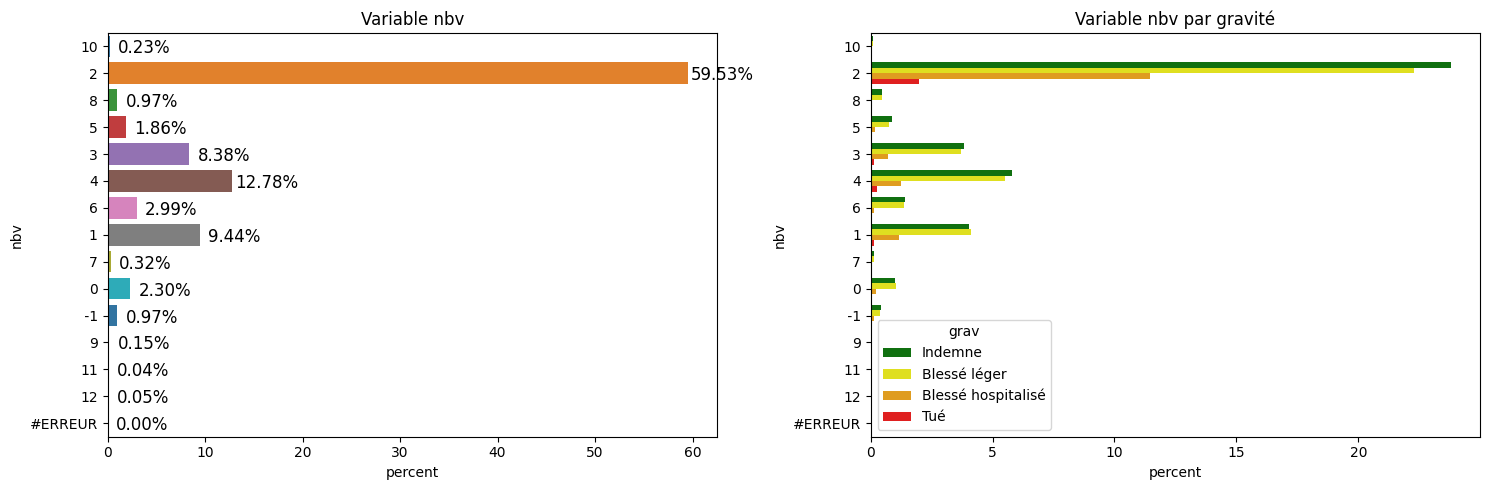

In [50]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))

sns.countplot(data=df_grav,y="nbv",hue='nbv',stat='percent',palette='tab10',ax=axs[0],legend=False)

axs[0].set_title("Variable nbv")

sns.countplot(data=df_grav,y="nbv",hue='grav',stat='percent',palette=grav_palette,hue_order=grav_order,ax=axs[1])

axs[1].set_title("Variable nbv par gravité")

# Annotation
for p in axs[0].patches:
    axs[0].annotate('{:.2f}%'.format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(25, -5),
                textcoords='offset points')

fig.tight_layout()
plt.show()

**Remarques:**
> Plus de tués sur les routes à deux voies

### Distance en mètres au PR (pr1)

Taux de NA : 0.0 %
Taux de non renseigne : 0.0 %


count    493717.000000
mean        189.744198
std         311.011975
min           0.000000
25%           0.000000
50%           1.000000
75%         340.000000
max        9932.000000
Name: pr1, dtype: float64

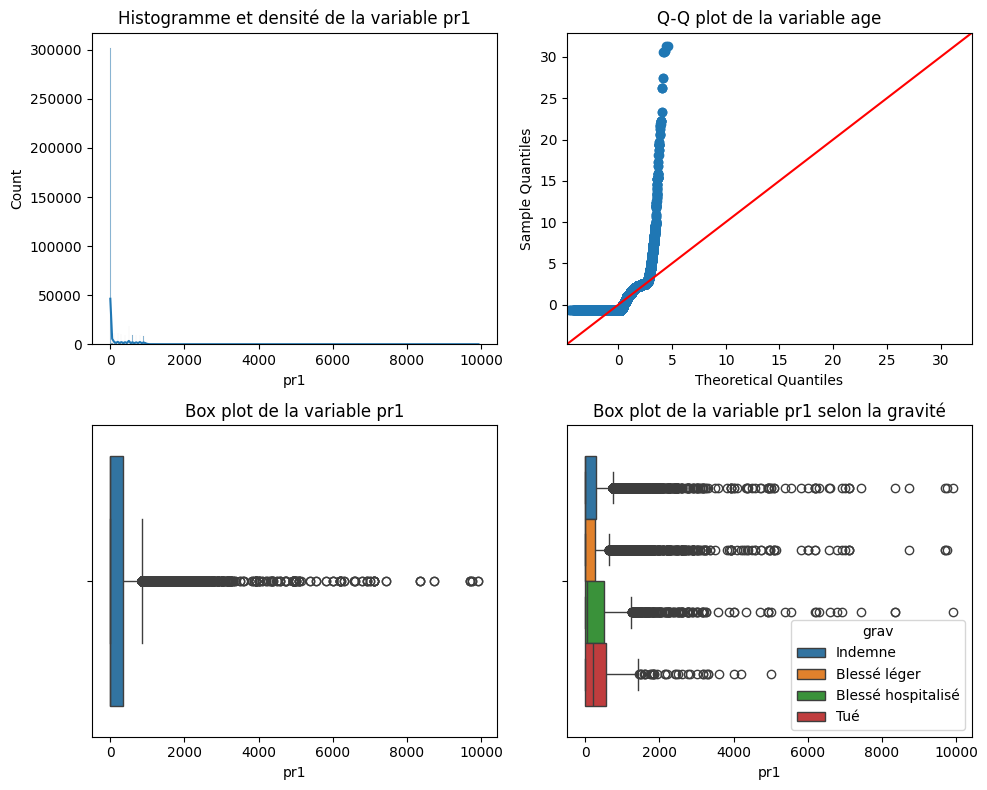

**** Test de normalité ****
Statistique de test : 0.5039935914597286
p-value : 0.0
Les données ne suivent pas une distribution normale


In [51]:
df_pr1 =df_grav.copy()
taux_na(df_pr1,'pr1')

# Correction
df_pr1['pr1']=df_pr1.pr1.replace('(1)','1').astype(int)

#STAT
display(df_pr1.pr1.describe())

plot_variable_quantitative(df_pr1,"pr1")

test_normalite(df_pr1['pr1'])

del df_pr1

**Remarques:**
>* Enormement d'outliers allant jusqu'à 10 000 mètres

>

### Largeur du terre plein (lartpc)

Taux de NA : 99.7808461122465 %
Taux de non renseigne : 0.0 %


count    1082.000000
mean        3.928743
std        13.260985
min         0.000000
25%         0.000000
50%         0.000000
75%         2.500000
max       180.000000
Name: lartpc, dtype: float64

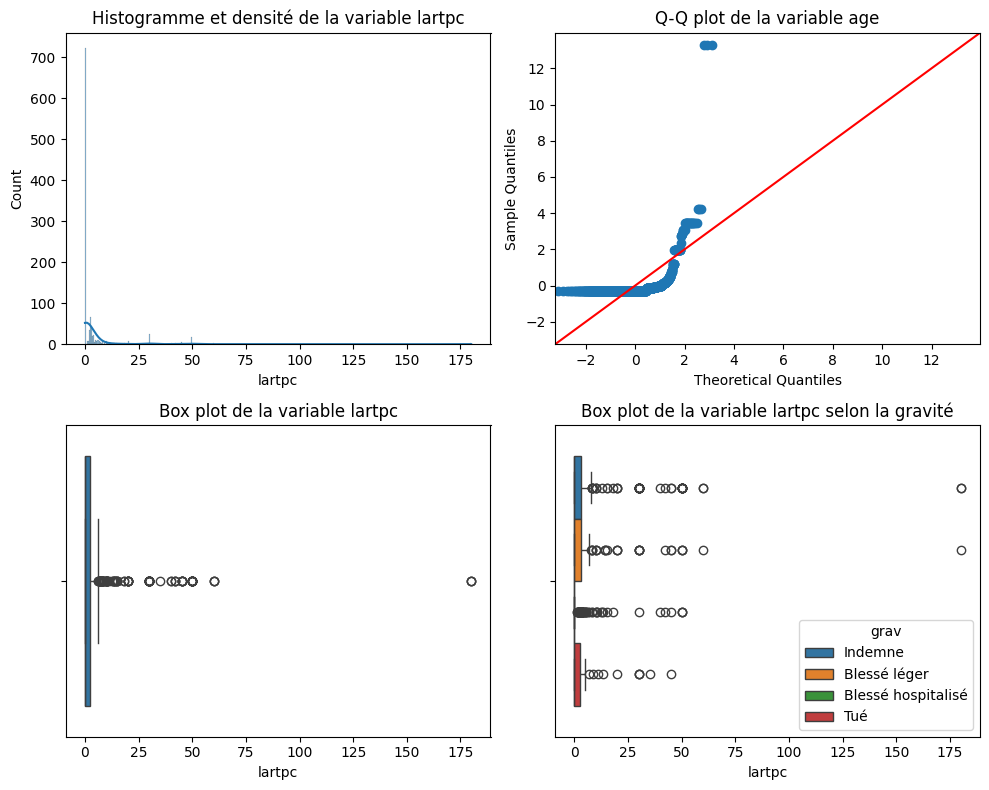

**** Test de normalité ****
Statistique de test : 0.5
p-value : 1.1772807983790629e-250
Les données ne suivent pas une distribution normale


In [52]:

df_lartpc=df_grav.copy()
taux_na(df_lartpc,'lartpc')

# Nettoyage/Correction
df_lartpc = df_lartpc.dropna(subset=['lartpc'])

df_lartpc['lartpc']=df_lartpc['lartpc'].str.replace(',', '.').astype(float)

#STAT
display(df_lartpc.lartpc.describe())

plot_variable_quantitative(df_lartpc,"lartpc")
test_normalite(df_lartpc['lartpc'])

del df_lartpc

**Remarques:**
>* Variable avec 99% de valeurs abscentes

### Largeur de la chaussée (larrout)

Taux de NA : 26.74507865842173 %
Taux de non renseigne : 0.0 %


count    22814.000000
mean         7.470273
std         16.337591
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max        730.000000
Name: larrout, dtype: float64

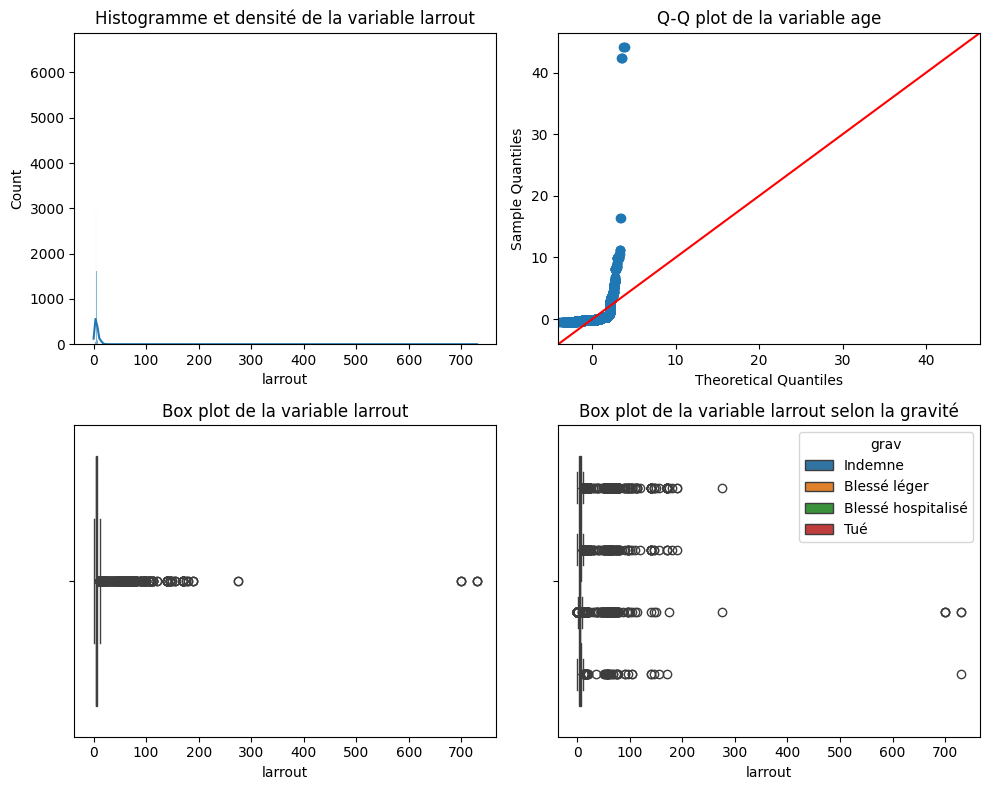

**** Test de normalité ****
Statistique de test : 0.9723066286625051
p-value : 0.0
Les données ne suivent pas une distribution normale


In [53]:
df_larrout=df_grav.copy()

taux_na(df_larrout,'larrout')

# Nettoyage/Correction
df_larrout = df_larrout.dropna(subset=['larrout'])


df_larrout['larrout']=df_larrout.larrout.str.replace(',','.').astype(float)
df_larrout = df_larrout.loc[df_larrout.larrout!= -1.0]


#STAT
display(df_larrout.larrout.describe())

plot_variable_quantitative(df_larrout,"larrout")
test_normalite(df_larrout['larrout'])

del df_larrout

**Remarques:**
>* 26% de valeurs null
>* Beaucoup d'outlier

### Vitesse max autorisée (vma)

Taux de NA : 0.0 %
Taux de non renseigne : 1.4463751501366167 %


count    486576.000000
mean         61.660799
std          24.623621
min           0.000000
25%          50.000000
50%          50.000000
75%          80.000000
max         901.000000
Name: vma, dtype: float64

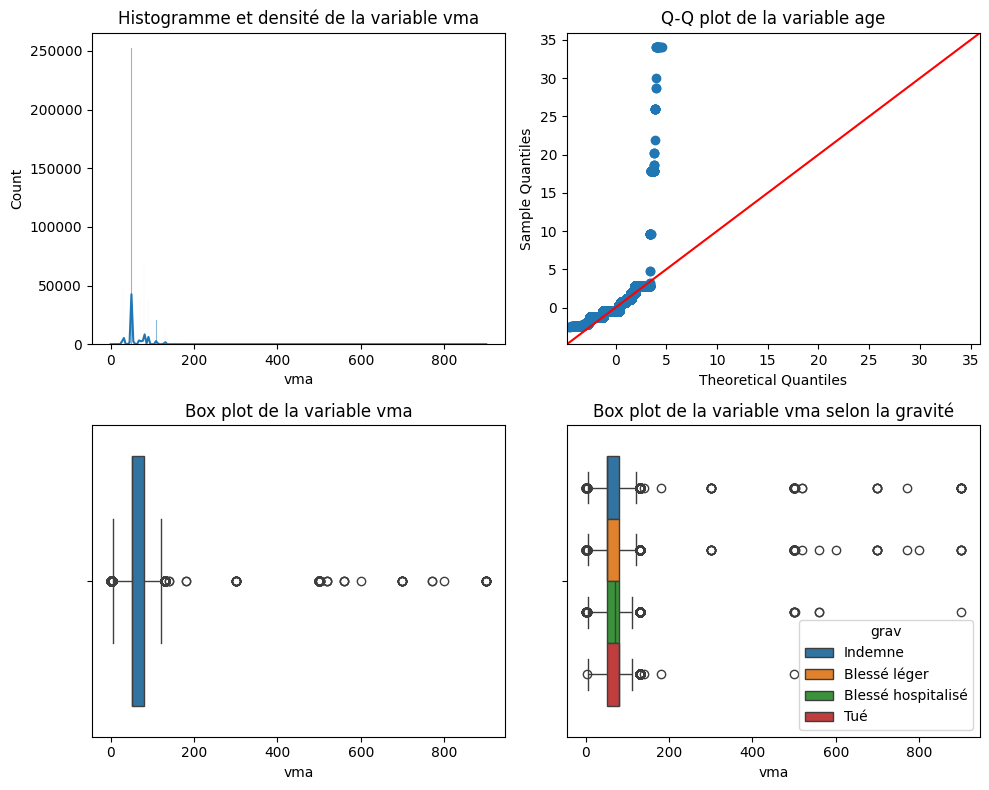

**** Test de normalité ****
Statistique de test : 0.9994900293525055
p-value : 0.0
Les données ne suivent pas une distribution normale


In [54]:
df_vma=df_grav.copy()

taux_na(df_vma,'vma')

# Nettoyage/Correction
df_vma = df_vma.loc[df_vma.vma!= -1]


#STAT
display(df_vma.vma.describe())

plot_variable_quantitative(df_vma,"vma")
test_normalite(df_vma['vma'])

#del df_vma

#### Correction de quelques valeurs arbitrairement

********** Correction arbitraires des valeurs **********


count    486576.000000
mean         61.510274
std          22.975328
min           0.000000
25%          50.000000
50%          50.000000
75%          80.000000
max         180.000000
Name: vma, dtype: float64

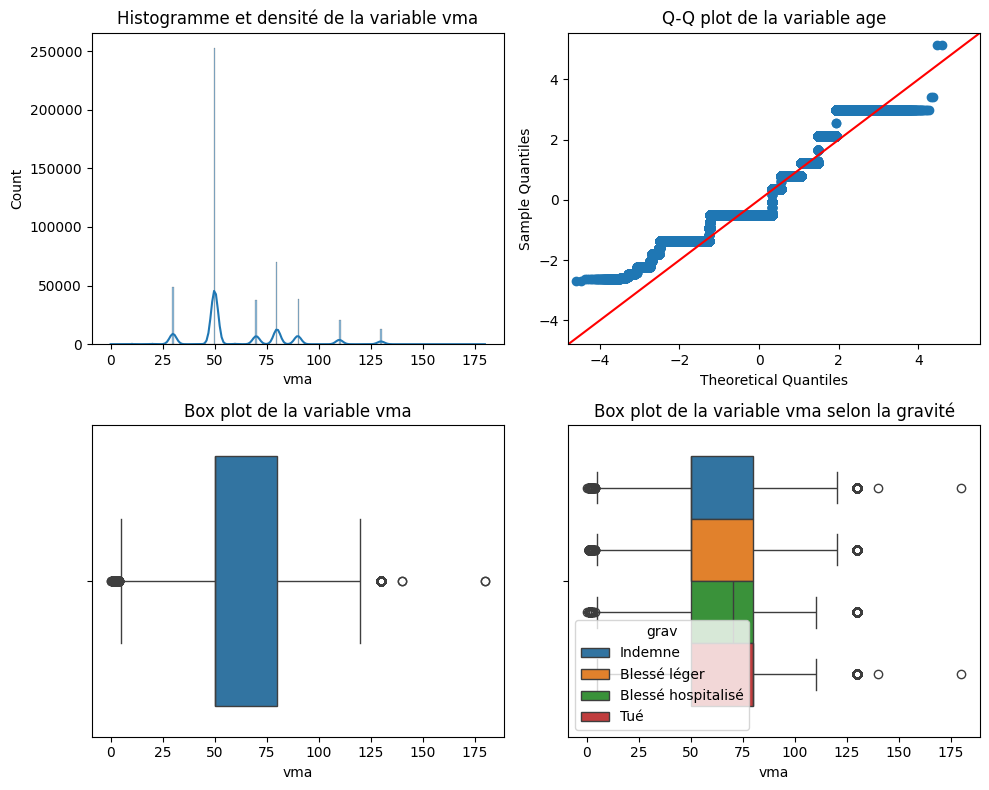

**** Test de normalité ****
Statistique de test : 0.9994900293525055
p-value : 0.0
Les données ne suivent pas une distribution normale


In [55]:
## Correction des valeur et 
print("********** Correction arbitraires des valeurs **********")

## Correction des valeurs :
df_vma.replace(300, 30, inplace=True)
df_vma.replace(500, 50, inplace=True)
df_vma.replace(560, 56, inplace=True)
df_vma.replace(600, 60, inplace=True)
df_vma.replace(900, 90, inplace=True)
df_vma.replace(700, 70, inplace=True)
df_vma.replace(800, 80, inplace=True)
df_vma.replace(520, 52, inplace=True)

df_vma.replace(901, 91, inplace=True)
df_vma.replace(501, 51, inplace=True)
df_vma.replace(502, 52, inplace=True)
df_vma.replace(770, 77, inplace=True)
#display(df_vma.loc[df_vma.vma>=200])


#STAT
display(df_vma.vma.describe())

plot_variable_quantitative(df_vma,"vma")
test_normalite(df_vma['vma'])

del df_vma

**Remarques:**
>* On remarque des valeurs aberante tel que 900,770, 600,800 , qui sont probalement des erreurs de saisie
>* Même après quelques corrections la vitesse moyenne des tués est la plus importantes

### Nombre d’occupants dans le transport en commun (occutc)

Taux de NA : 98.75718275854386 %
Taux de non renseigne : 0.0 %


count    6136.000000
mean        5.360169
std         8.293005
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        38.000000
Name: occutc, dtype: float64

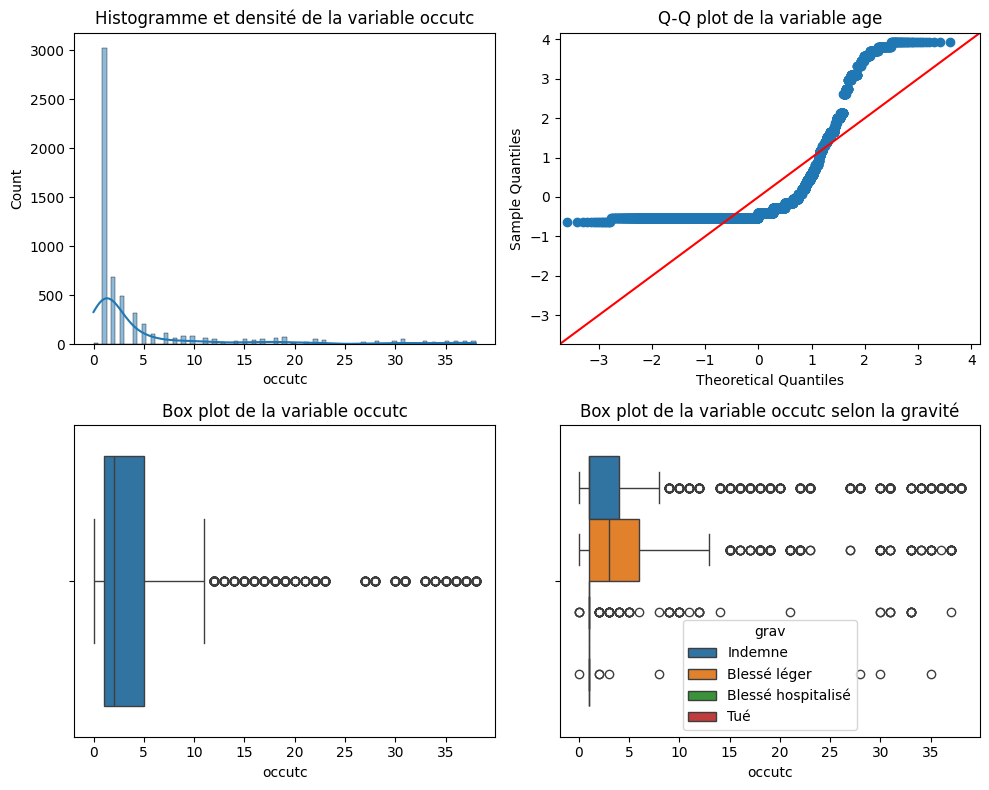

**** Test de normalité ****
Statistique de test : 0.838737184138947
p-value : 0.0
Les données ne suivent pas une distribution normale


In [56]:
df_occutc=df_grav.copy()

taux_na(df_occutc,'occutc')

# Nettoyage/Correction
df_occutc = df_occutc.dropna(subset=['occutc'])


#STAT
display(df_occutc.occutc.describe())

plot_variable_quantitative(df_occutc,"occutc")
test_normalite(df_occutc['occutc'])
del df_occutc

**Remarques:**
>* 98 % des valeurs sont absentes
>* Des valeurs extremes mais pas forcement abérantes car on peut avoir des transports avec plus 35 passagers 

### Latitude

Taux de NA : 0.0 %
Taux de non renseigne : 0.0 %


count    6136.000000
mean        5.360169
std         8.293005
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        38.000000
Name: occutc, dtype: float64

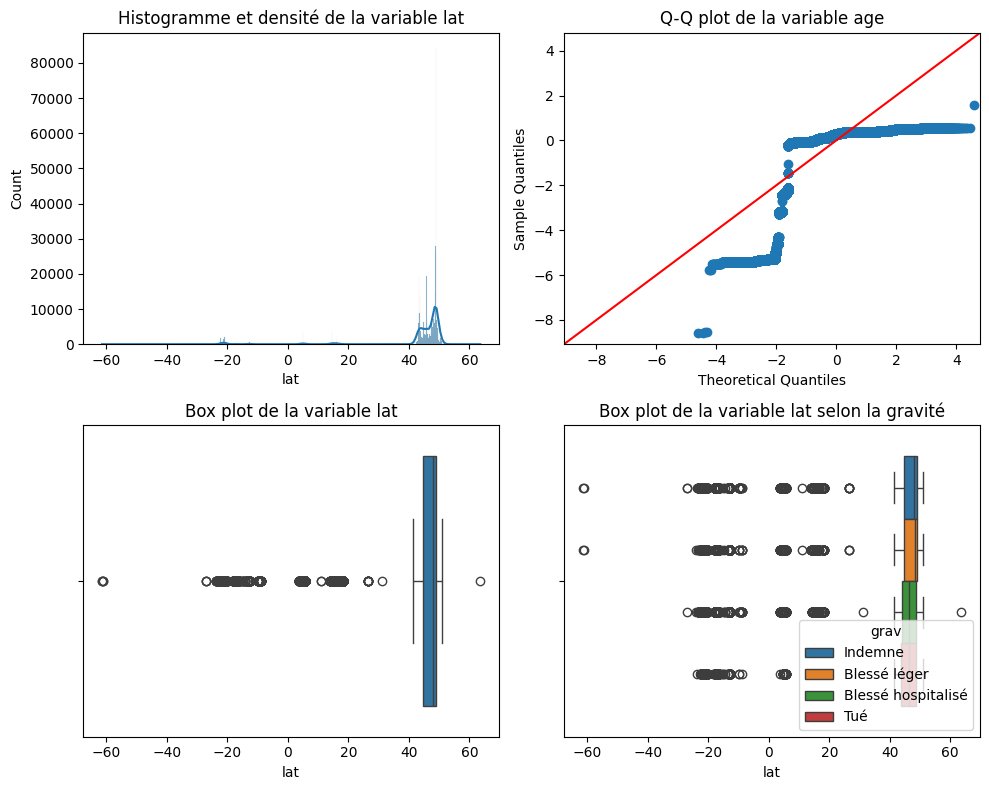

**** Test de normalité ****
Statistique de test : 0.9730000376383718
p-value : 0.0
Les données ne suivent pas une distribution normale


In [57]:
df_lat = df_grav.copy()
df_lat['lat']=df_lat['lat'].str.replace(',', '.').astype(float)

taux_na(df_lat,'lat')

#STAT
display(df_lat.occutc.describe())

plot_variable_quantitative(df_lat,"lat")
test_normalite(df_lat['lat'])
del df_lat

### Longitude

Taux de NA : 0.0 %
Taux de non renseigne : 0.00020254518276664567 %


count    6136.000000
mean        5.360169
std         8.293005
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        38.000000
Name: occutc, dtype: float64

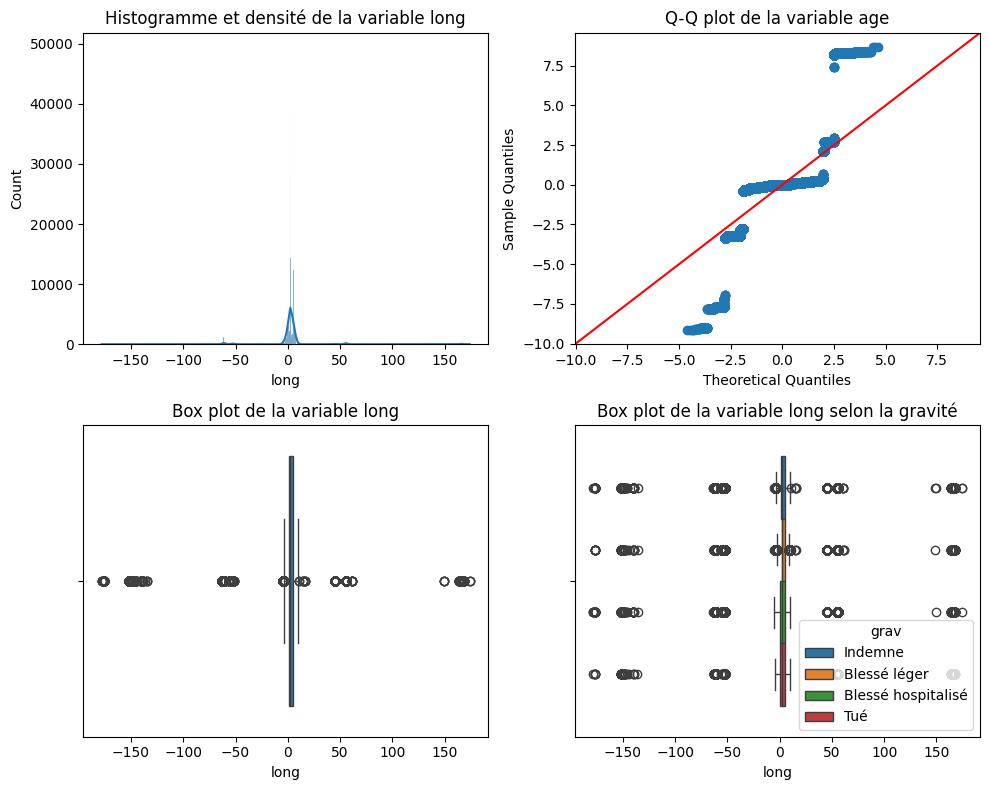

**** Test de normalité ****
Statistique de test : 0.6898578748176027
p-value : 0.0
Les données ne suivent pas une distribution normale


In [58]:
df_long = df_grav.copy()
df_long['long']=df_long['long'].str.replace(',', '.').astype(float)

taux_na(df_long,'long')

# Nettoyage/Correction
#df_occutc = df_occutc.dropna(subset=['occutc'])


#STAT
display(df_long.occutc.describe())

plot_variable_quantitative(df_long,"long")
test_normalite(df_long['long'])
del df_long

### Longitude et Latitude: Réprensentation sur une carte

Taux de NA lat : 0.0 %
Taux de NA long : 0.0 %


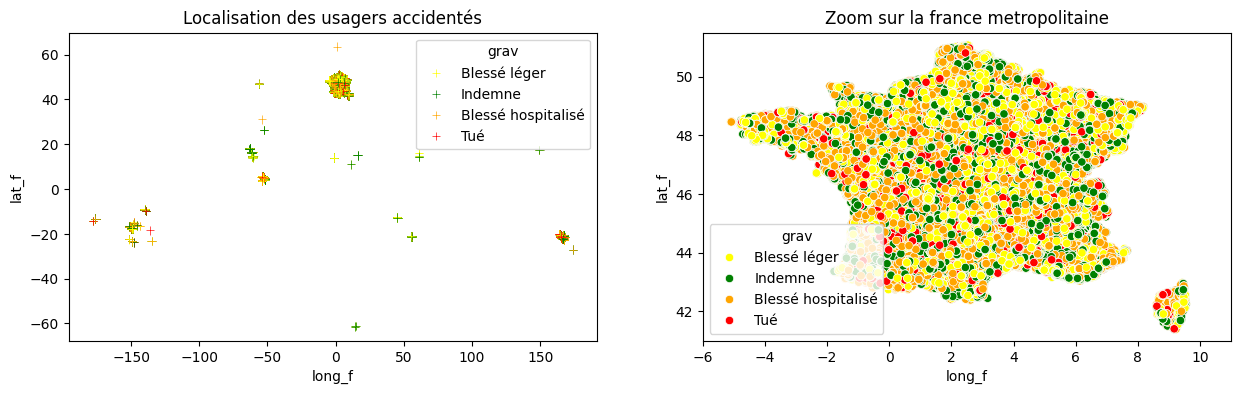

/var/folders/wg/2lvqcrzd3tl6wxsdx709vxdw0000gn/T/ipykernel_27482/540462422.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_lat['grav_order']=df_lat.grav_order.replace("Tué",4)


[2 1 3 4]


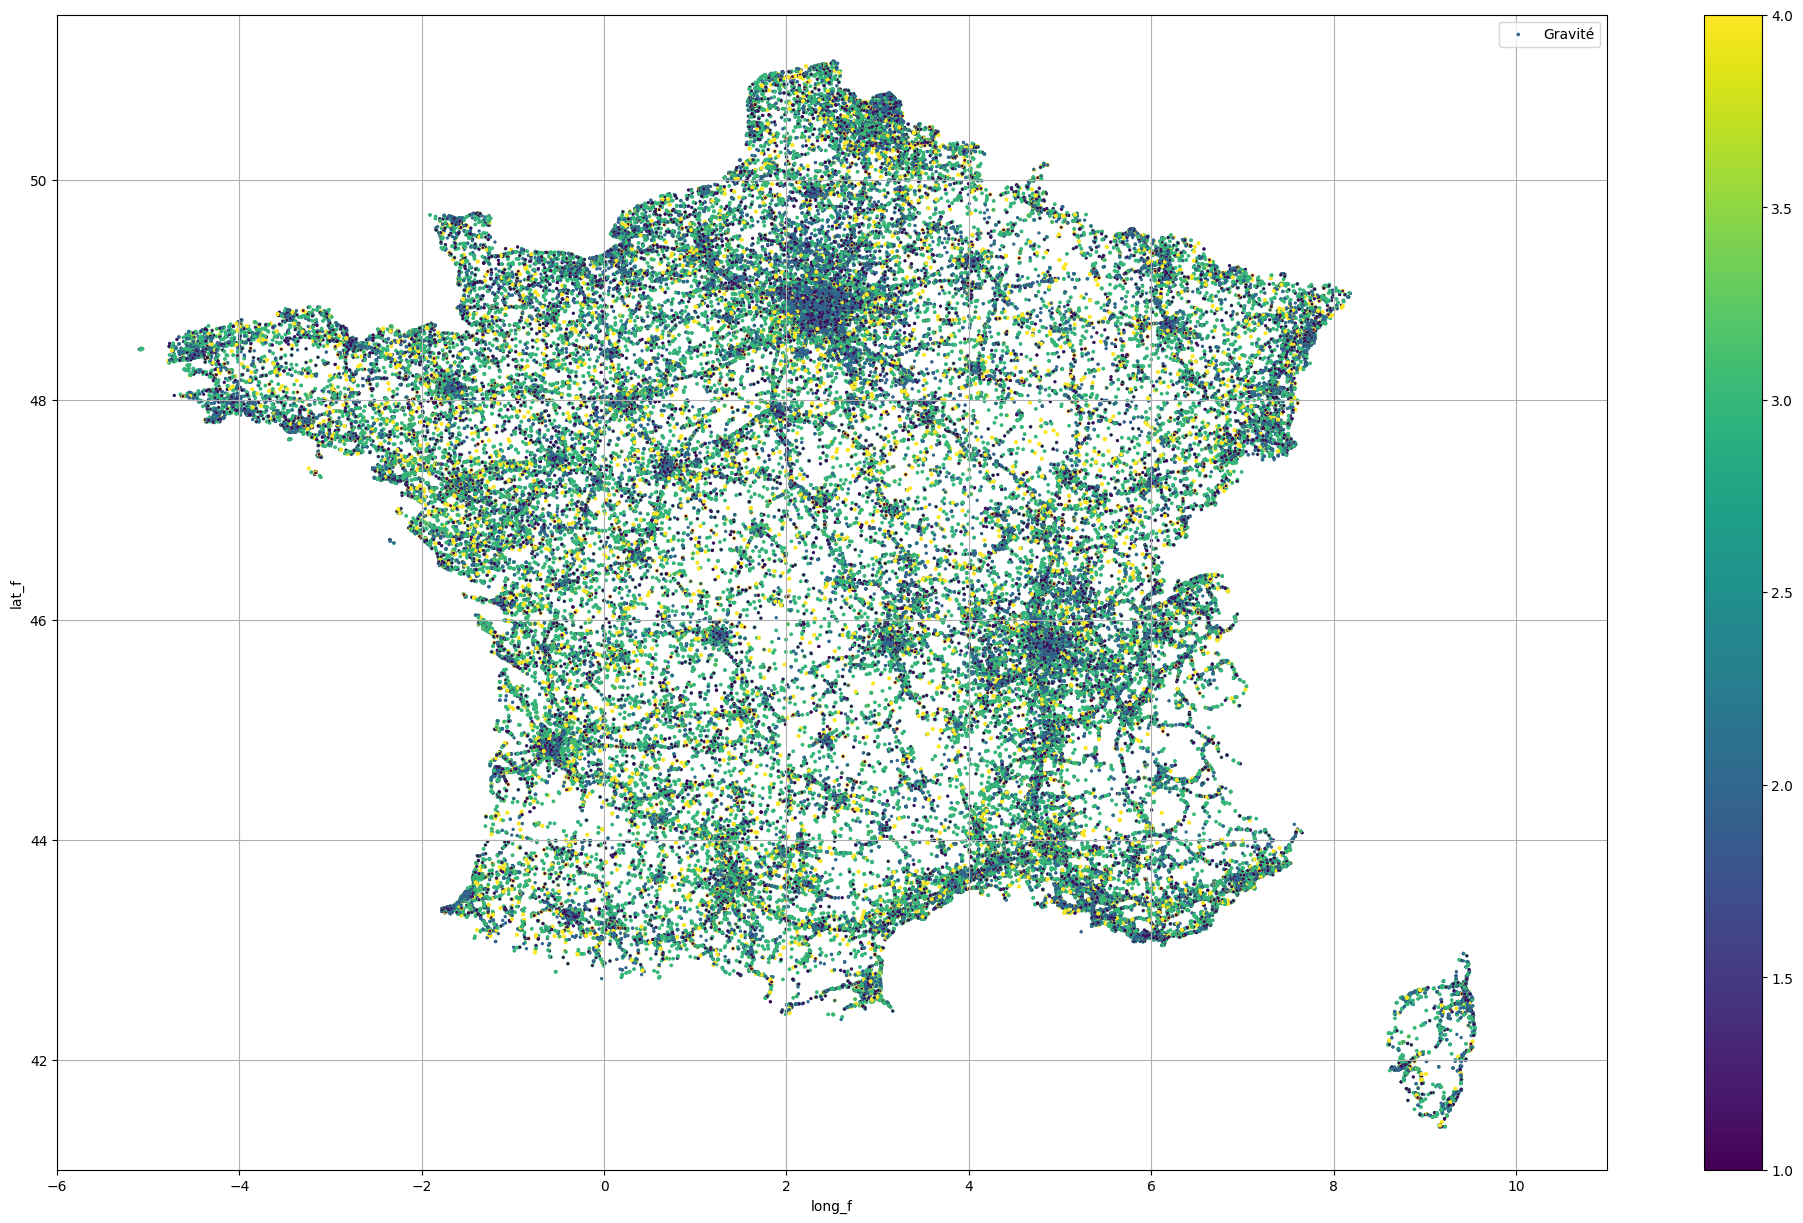

In [59]:
print("Taux de NA lat :",df_grav.lat.isna().sum()*100/df_grav.shape[0],"%")
print("Taux de NA long :",df_grav.long.isna().sum()*100/df_grav.shape[0],"%")

df_lat = df_grav.copy()

df_lat['lat_f']=df_lat['lat'].str.replace(',', '.').astype(float)
df_lat['long_f']=df_lat['long'].str.replace(',', '.').astype(float)

fig, axs = plt.subplots(ncols=2,figsize=(15, 4))
sns.scatterplot(df_lat,x=df_lat['long_f'], y=df_lat['lat_f'], hue='grav',palette=grav_palette,ax=axs[0],marker="+")

axs[0].set_title("Localisation des usagers accidentés")

sns.scatterplot(df_lat,x=df_lat['long_f'], y=df_lat['lat_f'], hue='grav',palette=grav_palette,ax=axs[1])
axs[1].set_ylim([41,51.5])
axs[1].set_xlim([-6.0,11.0])
axs[1].set_title("Zoom sur la france metropolitaine")
plt.show()

# Ordre 
df_lat['grav_order']=df_lat.grav
df_lat['grav_order']=df_lat.grav_order.replace("Non renseigné",0)
df_lat['grav_order']=df_lat.grav_order.replace("Indemne",1)
df_lat['grav_order']=df_lat.grav_order.replace("Blessé léger",2)
df_lat['grav_order']=df_lat.grav_order.replace("Blessé hospitalisé",3)
df_lat['grav_order']=df_lat.grav_order.replace("Tué",4)


print(df_lat['grav_order'].unique())

df_lat.plot(kind="scatter",
            x="long_f",
            y="lat_f",
            grid=True,
            s=df_lat["grav_order"],
            label="Gravité",
            c=df_lat["grav_order"], 
            cmap="viridis", colorbar=True,
            legend=True, sharex=False, figsize=(25, 15)
           )

plt.ylim([41,51.5])
plt.xlim([-6.0,11.0])

plt.show()



>* Toute la France est concerné par des accidents les plus graves
>* On observe une concentration des d'accidents sur les grandes métropoles et grands les axes routiers

## 3 - Corrélation entre les variables quantitatives

In [60]:
var_quantitative =['jour', 'mois', 'an', 'hrmn', 'lat', 'long', 'nbv', 'pr1', 'lartpc', 'larrout', 'vma', 'occutc', 'an_nais']

var_categorielles= ['lum', 'dep', 'com', 'agg', 'int', 'atm', 'col', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ',\
                    'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu1', 'secu2',\
                    'secu3', 'locp', 'actp', 'etatp']
var_inconnu =['adr','voie','v1','v2']
var_id =['Num_Acc', 'pr', 'id_vehiucle', 'num_veh', 'id_usagers']

len(var_quantitative)+len(var_categorielles)+len(var_id)+len(var_inconnu)

55

#### Nettoyage et correction

In [61]:
df_qtv= df[var_quantitative].copy()

# hrmn ==> Split en deux variables heures et minutes
df_qtv['heure']=df_qtv['hrmn'].apply(lambda x : x.split(':')[0]).astype(int)
df_qtv['minute']=df_qtv.hrmn.apply(lambda x : str(x).split(':')[1]).astype(int)
df_qtv=df_qtv.drop(columns=['hrmn'])

# lat et long ==> map to float
df_qtv['lat']=df_qtv['lat'].str.replace(',', '.').astype(float)
df_qtv['long']=df_qtv['long'].str.replace(',', '.').astype(float)

# nbv => Replace  #ERREUR par le mode (2) et parse en int ==> TODO : que faire avec les -1 ?
df_qtv['nbv']=df_qtv.nbv.replace({' -1':'-1','#ERREUR':df_qtv.nbv.mode()[0]})
df_qtv['nbv']=df_qtv['nbv'].astype(int)


# pr1 => remplacement des (1) en 1~
df_qtv['pr1']=df_qtv.pr1.replace({'(1)':'1'})
df_qtv['pr1']=df_qtv['pr1'].astype(int)

# lartpc 493 100 valeurs NA 
df_age['age'] = df_age['an'].astype(int) - df_age['an_nais'].astype(int)

df_qtv['lartpc']=df_qtv['lartpc'].str.replace(',', '.').astype(float)

# larrout
df_qtv['larrout']=df_qtv['larrout'].str.replace(',', '.').astype(float)

## taux de NA
#display(df_qtv.isna().sum()/df_qtv.shape[0])

## Suppression des colonnes lartpc,occutc
df_qtv=df_qtv.drop(columns=['lartpc','occutc'])

## Remplacement des valeur manquantes par la moyenne
df_qtv['larrout']=df_qtv['larrout'].fillna(df_qtv['larrout'].mean())
df_qtv=df_qtv.dropna(subset=['an_nais'])
#display(df_qtv['an_nais'].mode())

display(df_qtv.head(3))
df_qtv.info()

jour  mois    an       lat     long  nbv  pr1   larrout  vma  an_nais  \
0    30    11  2019  48.89621  2.47012   10  900 -0.465954   70   2002.0   
1    30    11  2019  48.89621  2.47012   10  900 -0.465954   70   1993.0   
2    30    11  2019  48.89621  2.47012   10  900 -0.465954   70   1959.0   

   heure  minute  
0      1      30  
1      1      30  
2      1      30

<class 'pandas.core.frame.DataFrame'>
Index: 488077 entries, 0 to 494181
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   jour     488077 non-null  int64  
 1   mois     488077 non-null  int64  
 2   an       488077 non-null  int64  
 3   lat      488077 non-null  float64
 4   long     488077 non-null  float64
 5   nbv      488077 non-null  int64  
 6   pr1      488077 non-null  int64  
 7   larrout  488077 non-null  float64
 8   vma      488077 non-null  int64  
 9   an_nais  488077 non-null  float64
 10  heure    488077 non-null  int64  
 11  minute   488077 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 48.4 MB


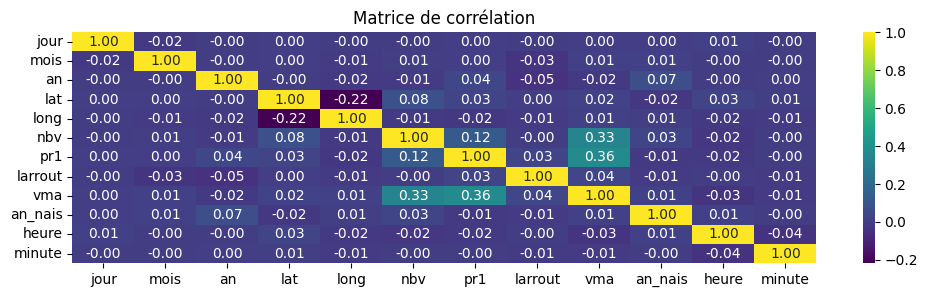

In [62]:

plt.figure(figsize=(12, 3))
sns.heatmap(df_qtv.corr(),cmap = 'viridis',fmt=".2f",annot=True)

plt.title("Matrice de corrélation")
plt.show()

**Remarques:**
>* La correlation la plus forte est entre pr1 et vma et est faible
>* Globalement pas de corrélation entre les variables numériques 